<center><b><h1 style="font-size: 60px; color: red;"><u>Retail Data Analysis</u></h1></b></center>
<br>
<br>

<center><b><u><h1 style="font-size: 35px;">Tasks performed in this notebook</h1></u></b></center>
<br>
<br>
<div style="font-size: 25px;">
    <ul>
        <li><b>Predicting the department-wide sales for each store for the following year.</b></li>
        <br>
        <li><b>Modeling the effects of markdowns on holiday weeks.</b></li>
        <br>
        <li><b>Providing recommended actions based on the insights drawn, with <br><br> prioritization placed on 
            largest business impacts.</b></li>
    </ul>
</div>
<br>
<br>

<center><u><b><h1 style="font-size: 30px;">Importing Libraries</h1></b></u></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<center><b><u><h1 style="font-size: 30px;">Importing the data into dataframes</h1></u></b></center>

In [2]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

In [3]:
features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [4]:
sales.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

In [5]:
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

<center><b><u><h1 style="font-size: 30px;">Converting the dates</h1></u></b></center>

In [6]:
features['Date'] = pd.to_datetime(features['Date'],format="%d/%m/%Y")
sales['Date'] = pd.to_datetime(sales['Date'],format="%d/%m/%Y")

<center><b><u><h1 style="font-size: 30px;">Creating a merged dataset(Based on sales data)</h1></u></b></center>

In [7]:
# Its probably better to combine the dataframes into a master dataframe

# First we do features and sales

featSaleDF = pd.merge(features,sales, on=['Store','Date','IsHoliday'],how='left')

# Now we combine the stores dataframe

mergedDF = pd.merge(featSaleDF,stores, on=['Store'], how='left')

mergedDF.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
2      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
3      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
4      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Dept  \
0        NaN        NaN  211.096358         8.106      False   1.0   
1        NaN        NaN  211.096358         8.106      False   2.0   
2        NaN        NaN  211.096358         8.106      False   3.0   
3        NaN        NaN  211.096358         8.106      False   4.0   
4        NaN        NaN  211.096358         8.106      False   5.0   

   Weekly_Sales Type    Size  
0      24924.50    A  151315  
1      50605.27    A  151315  
2      13740.12    A  151315  
3      39954.04    A  151315  
4      32229.38    A  151315

<center><b><u><h1 style="font-size: 30px;">Visualizing the data after merging</h1></u></b></center>

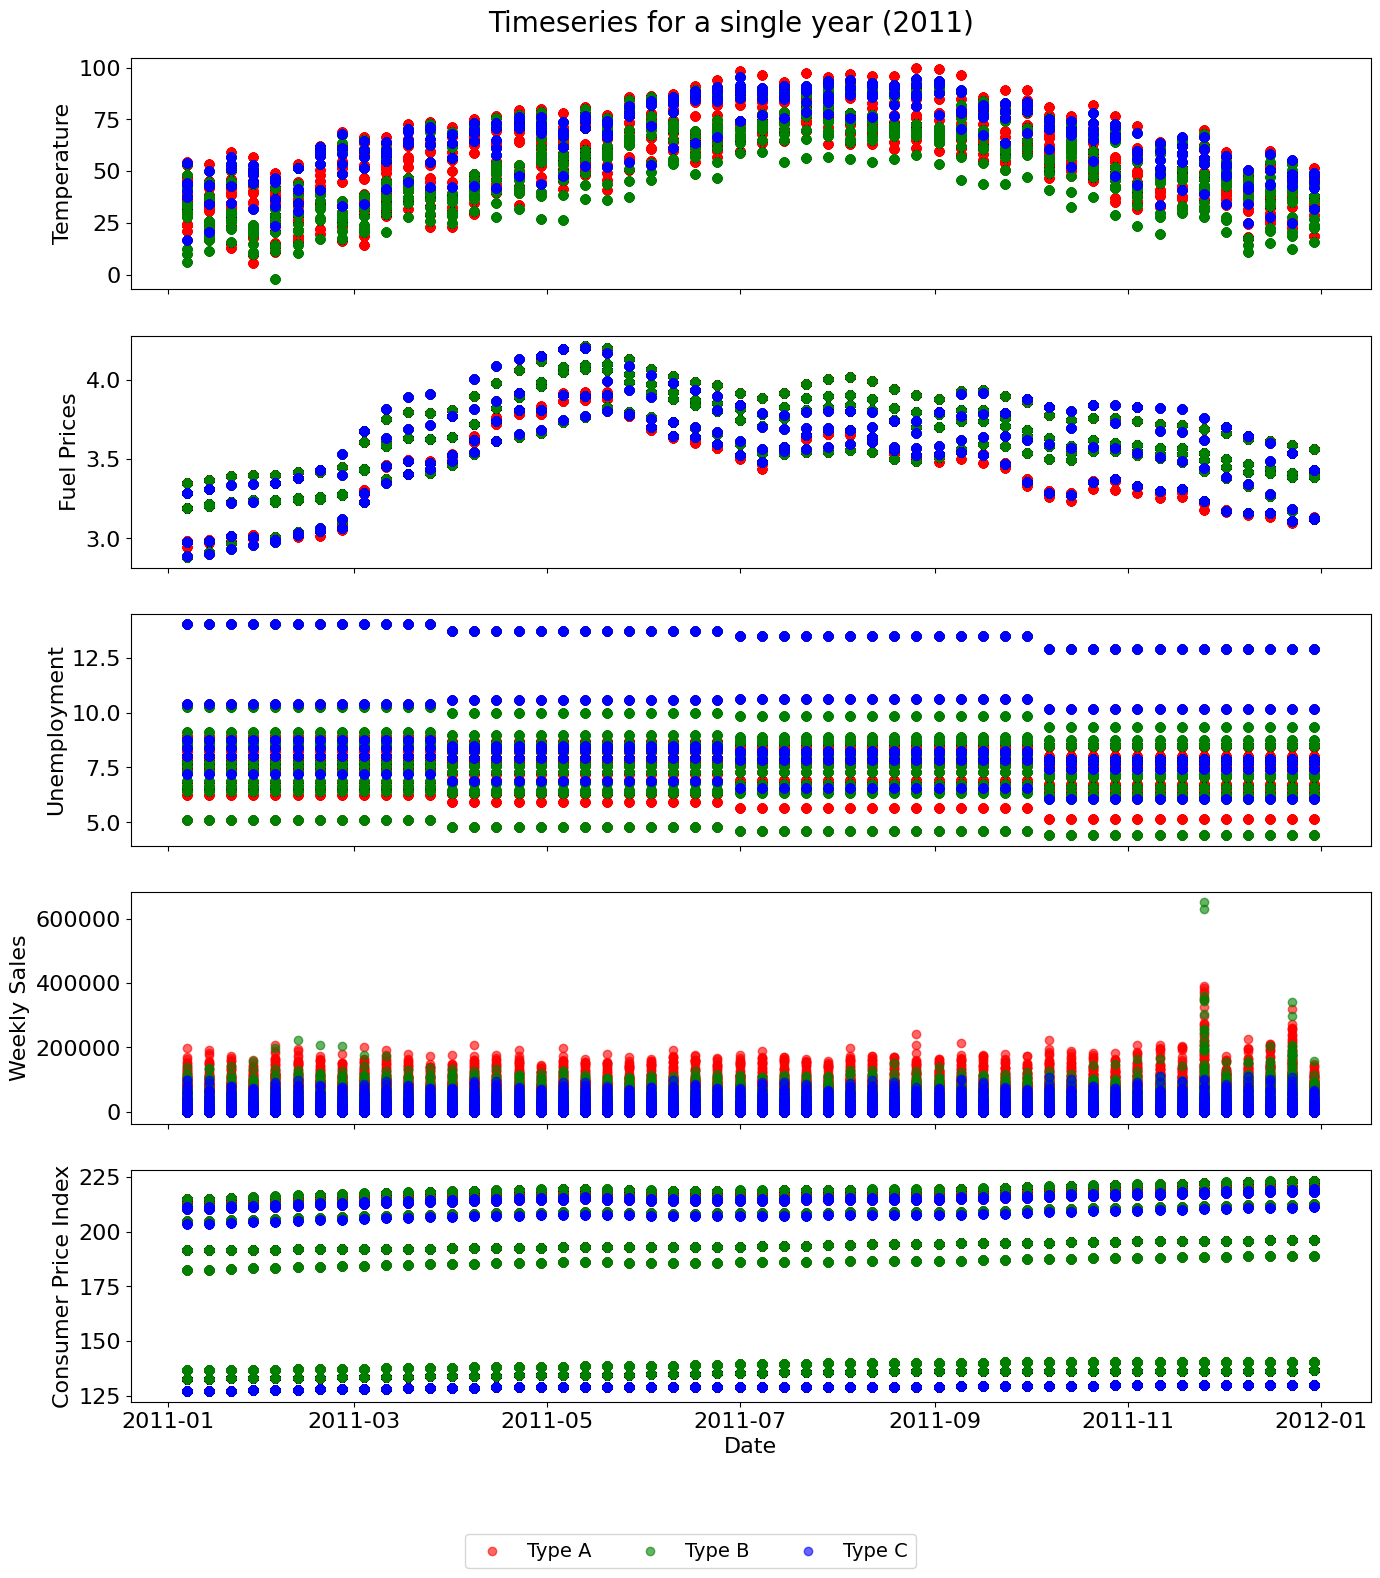

In [8]:
# Filter the DataFrame for the year 2011
df_2011 = mergedDF[mergedDF['Date'].dt.year == 2011]

# Create a single column subplot with shared x-axis
fig, axes = plt.subplots(nrows=5, figsize=(16, 16), sharex=True)

# Define the color mapping for different types
color_mapping = {'A': 'red', 'B': 'green', 'C': 'blue'}

# Iterate over each type and add a scatter plot for each
for typ in df_2011['Type'].unique():
    filtered_data = df_2011[df_2011['Type'] == typ]
    for ax, column, ylabel in zip(axes, 
                                  ['Temperature', 'Fuel_Price', 'Unemployment', 'Weekly_Sales', 'CPI'],
                                  ['Temperature', 'Fuel Prices', 'Unemployment', 'Weekly Sales', 'Consumer Price Index']):
        ax.scatter(filtered_data['Date'], filtered_data[column], 
                   color=color_mapping[typ], alpha=0.6, label=f'Type {typ}')
        ax.set_ylabel(ylabel, fontsize=16)


# Set labels and adjust fontsize
for ax in axes:
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)

axes[-1].set_xlabel('Date', fontsize=16)

# Create a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(df_2011['Type'].unique()), fontsize=14)

# Adjust layout
fig.subplots_adjust(top=0.95)  # Adjust top to make room for title

fig.suptitle('Timeseries for a single year (2011)',fontsize=20)

plt.show()

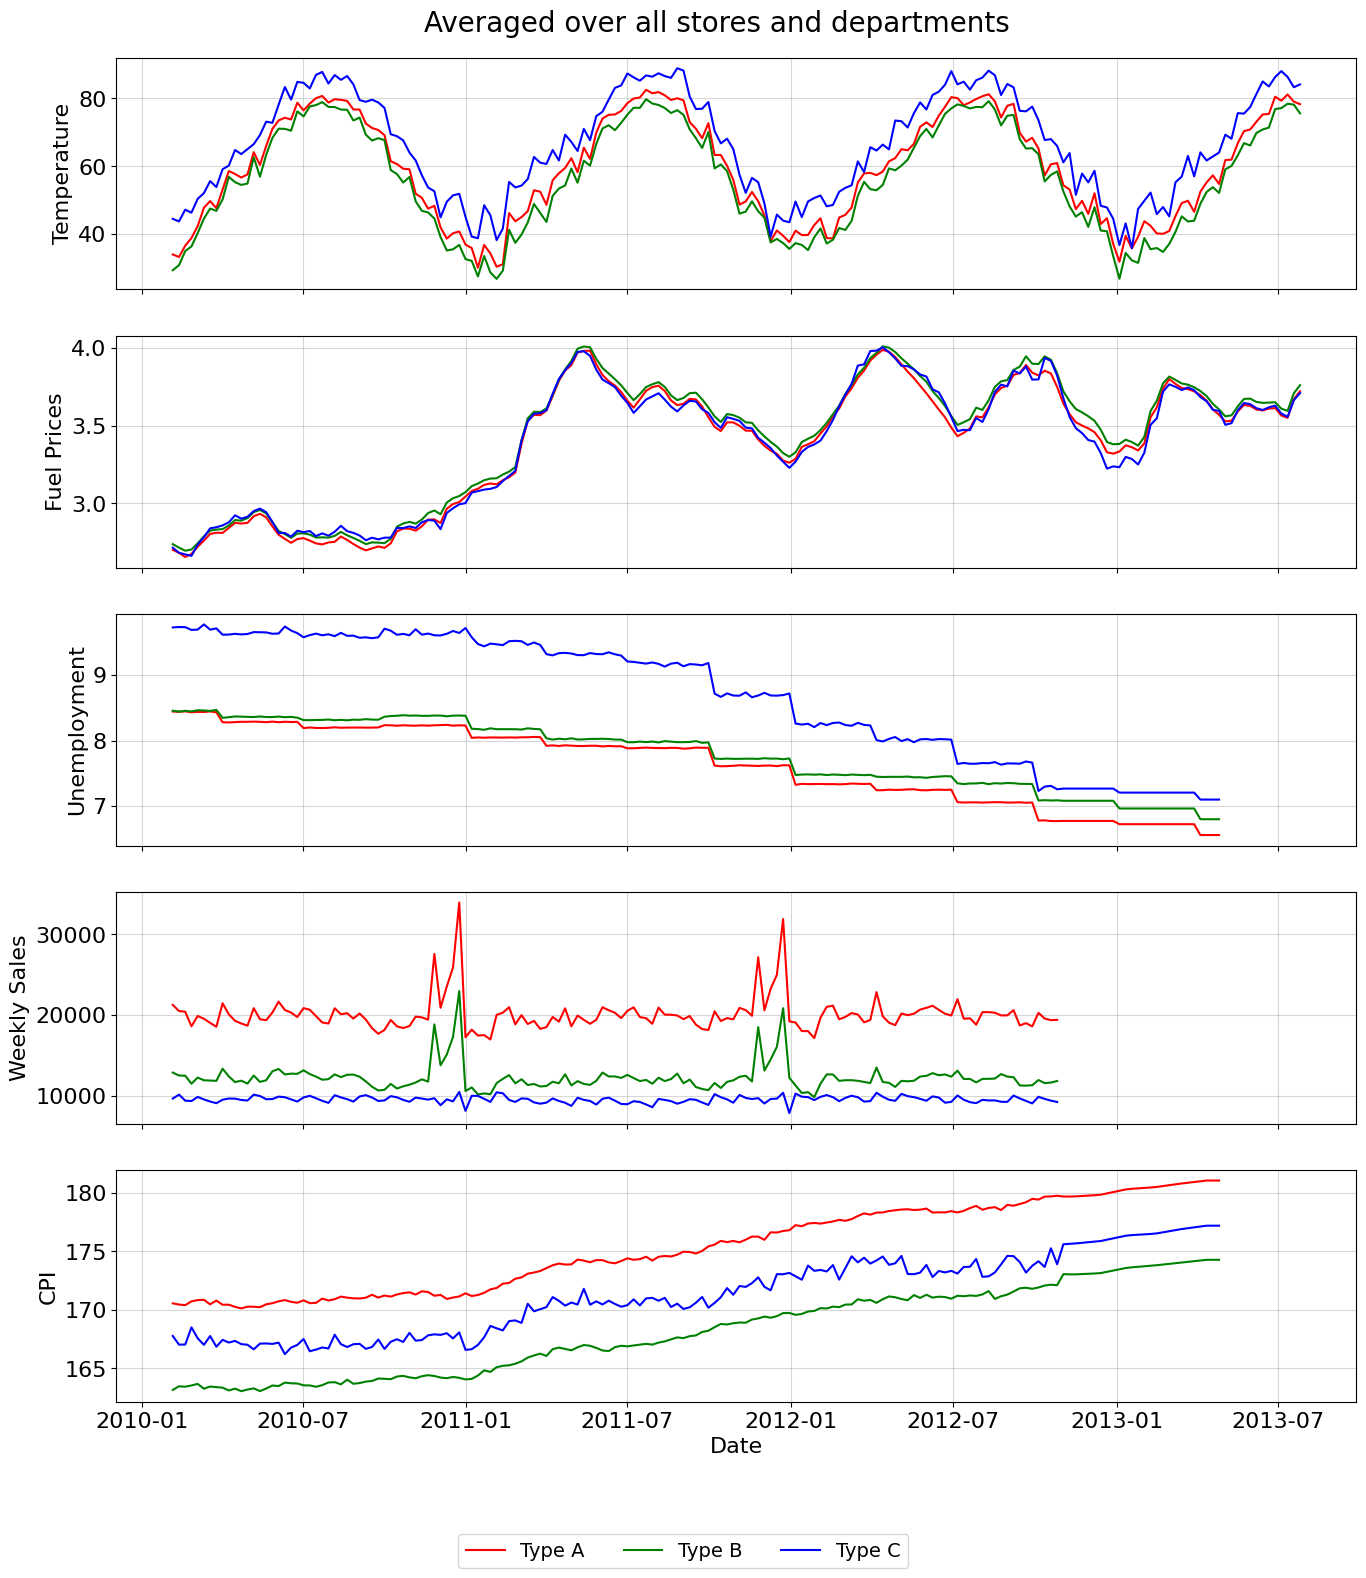

In [9]:
# Group by 'Type' and 'Date' and calculate the mean for each group
grouped_data = mergedDF.groupby(['Type', 'Date']).mean()

# Create a single column subplot with shared x-axis
fig, axes = plt.subplots(nrows=5, figsize=(16, 16), sharex=True)

# Plotting time series for each variable and type
for typ in mergedDF['Type'].unique():
    axes[0].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['Temperature'],color=color_mapping[typ],label=f'Type {typ}')
    axes[1].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['Fuel_Price'],color=color_mapping[typ],label=f'Type {typ}')
    axes[2].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['Unemployment'],color=color_mapping[typ],label=f'Type {typ}')
    axes[3].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['Weekly_Sales'],color=color_mapping[typ],label=f'Type {typ}')
    axes[4].plot(grouped_data.loc[typ].index, grouped_data.loc[typ]['CPI'],color=color_mapping[typ],label=f'Type {typ}')

# Set labels and add grid
y_labels = ['Temperature', 'Fuel Prices', 'Unemployment', 'Weekly Sales', 'CPI']
for ax, label in zip(axes, y_labels):
    ax.set_ylabel(label, fontsize=16)
    ax.grid(True,alpha=0.5)

axes[-1].set_xlabel('Date', fontsize=16)

# Adjusting tick parameters
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=16)

# Create a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(mergedDF['Type'].unique()), fontsize=14)

# Adjust layout
fig.subplots_adjust(top=0.95)  

fig.suptitle('Averaged over all stores and departments',fontsize=20)

plt.show()

<center><b><u><h1 style="font-size: 30px;">Working on department-wise sales for each store</h1></u></b></center>

In [10]:
print('Number of Stores = ',len(mergedDF['Store'].unique()))
print('Number of Departments = ',len(mergedDF['Dept'].unique()))

Number of Stores =  45
Number of Departments =  82


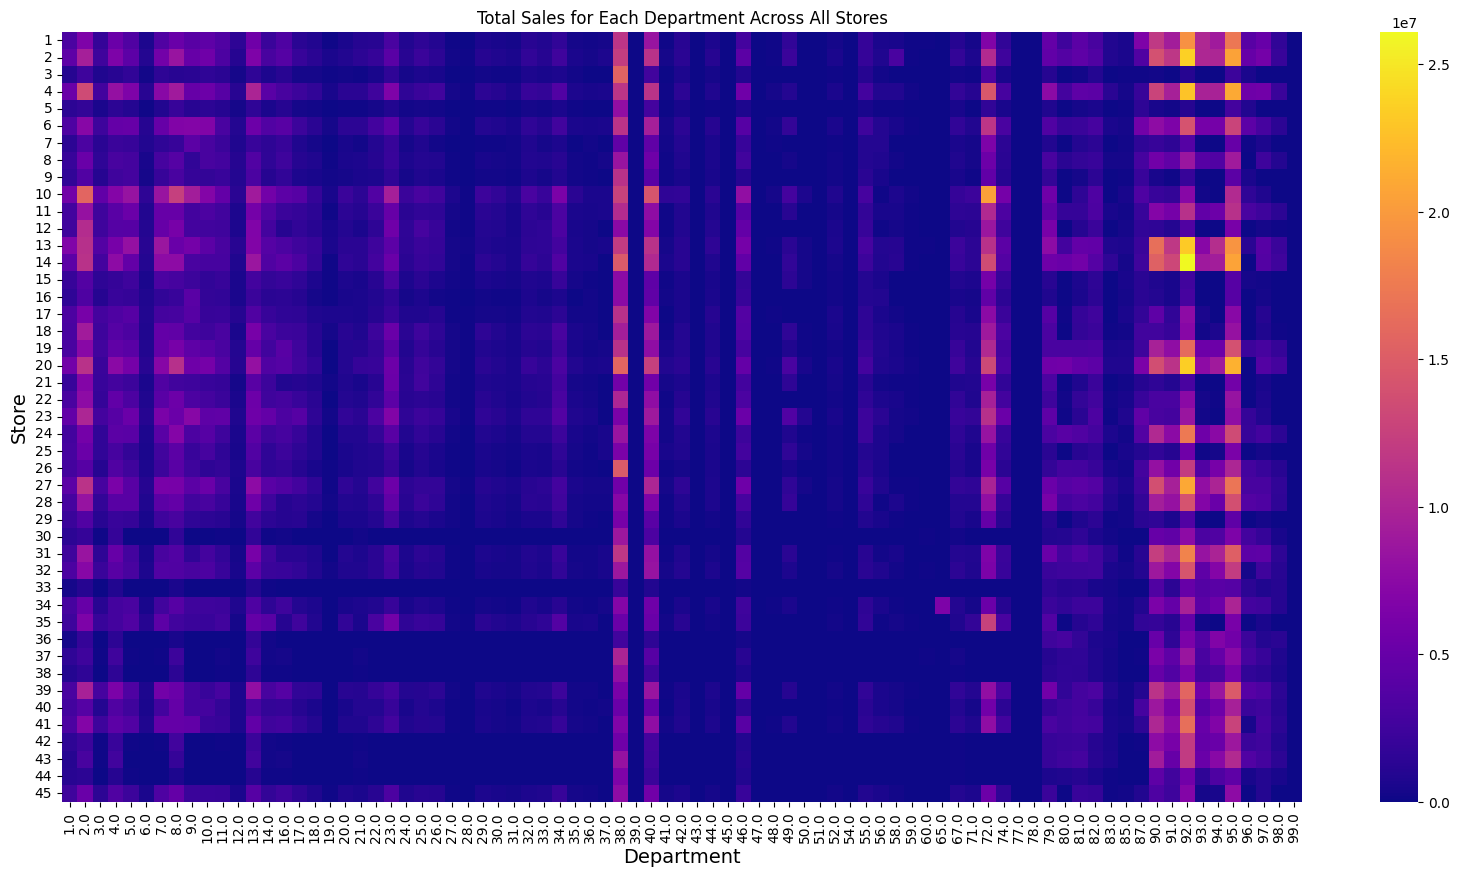

In [11]:
# Summarize sales data
sales_summary = mergedDF.groupby(['Store', 'Dept'])['Weekly_Sales'].sum().unstack()

sales_summary.fillna(0, inplace=True) # Because NaNs are no sales = 0$ value


# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(sales_summary, annot=False, cmap='plasma')
plt.title('Total Sales for Each Department Across All Stores')
plt.xlabel('Department',fontsize=14)
plt.ylabel('Store',fontsize=14)
plt.show()


<center><b><u><h1 style="font-size: 30px;">Let's Check which are the highest performing stores for now!</h1></u></b></center>

In [12]:
# Aggregate sales data at the store level
totalSales_byStore = mergedDF.groupby('Store')['Weekly_Sales'].sum()
totalSales_byDept = mergedDF.groupby('Dept')['Weekly_Sales'].sum()

# Sort the stores based on total sales in descending order
rankedStores = totalSales_byStore.sort_values(ascending=False)

# Sort the stores based on total sales in descending order
rankedDepts = totalSales_byDept.sort_values(ascending=False)

(0.0, 500000000.0)

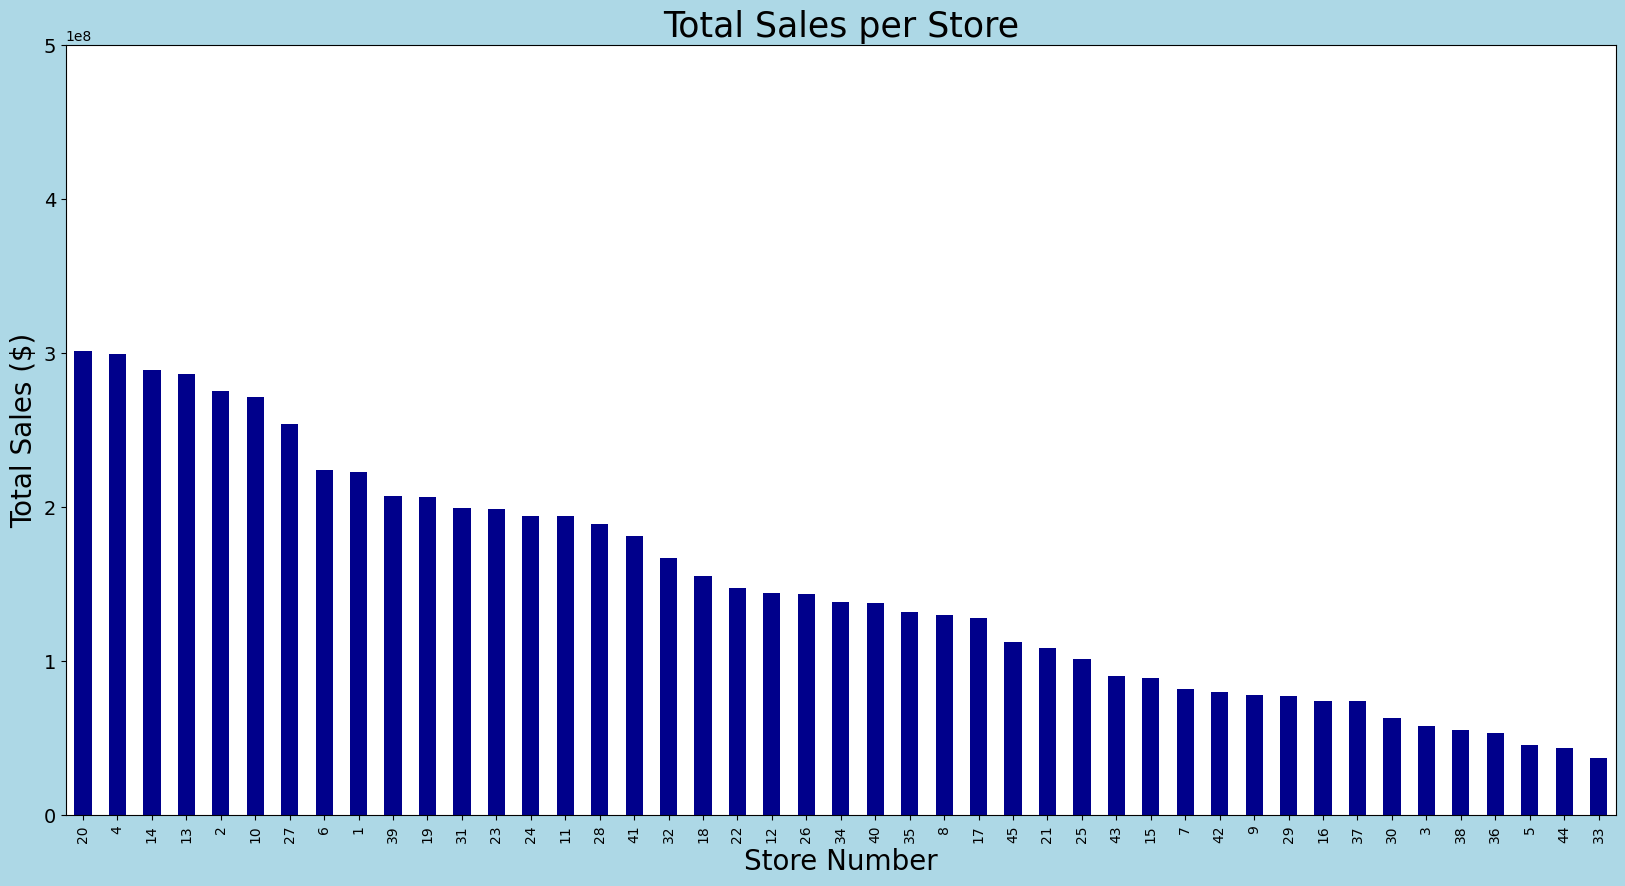

In [13]:
# Creating a bar plot
plt.figure(figsize=(20, 10),facecolor = 'lightblue')
rankedStores.plot(kind='bar',color = 'darkblue')
plt.title('Total Sales per Store', fontsize=25)
plt.xlabel('Store Number',fontsize=20)
plt.ylabel('Total Sales ($)',fontsize=20)
plt.xticks(rotation=90, fontsize=10)  # Rotate and set font size for x-ticks
plt.yticks(fontsize=14)  
plt.ylim([0, 5e8])

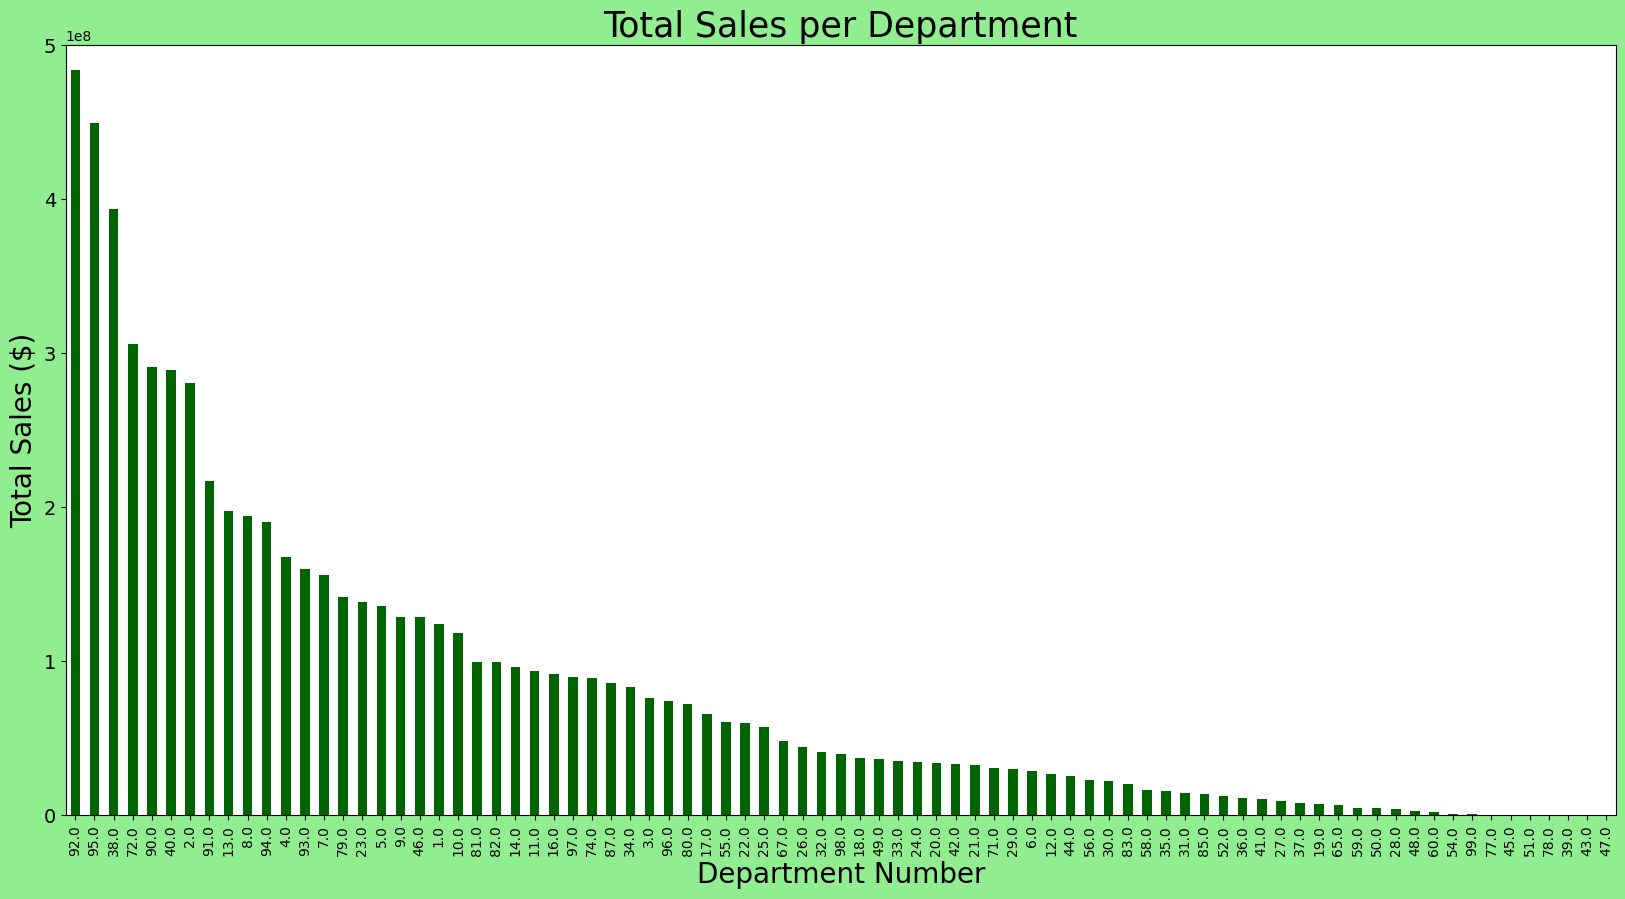

In [14]:
# Creating a bar plot
plt.figure(figsize=(20, 10), facecolor='lightgreen')
rankedDepts.plot(kind='bar', color='darkgreen')
plt.title('Total Sales per Department', fontsize=25) 
plt.xlabel('Department Number', fontsize=20)  
plt.ylabel('Total Sales ($)', fontsize=20) 
plt.xticks(rotation=90, fontsize=10)  # Rotate and set font size for x-ticks
plt.yticks(fontsize=14)  
plt.ylim([0, 5e8])
plt.show()

In [15]:
print('Highest Performing Store  = Store #',rankedStores.index[0])
print('Highest Performing Department  = Department #',int(rankedDepts.index[0]))

Highest Performing Store  = Store # 20
Highest Performing Department  = Department # 92


<center><b><u><h1 style="font-size: 30px;">Impacts of Markdowns during the holidays</h1></u></b></center>

In [16]:
#Get the holidays version of the dataset
holidaysDF = mergedDF[mergedDF['IsHoliday']==True]
holidaysDF

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
73          1 2010-02-12        38.51       2.548        NaN        NaN   
74          1 2010-02-12        38.51       2.548        NaN        NaN   
75          1 2010-02-12        38.51       2.548        NaN        NaN   
76          1 2010-02-12        38.51       2.548        NaN        NaN   
77          1 2010-02-12        38.51       2.548        NaN        NaN   
...       ...        ...          ...         ...        ...        ...   
422815     45 2012-09-07        75.70       3.911   11024.45      12.80   
422816     45 2012-09-07        75.70       3.911   11024.45      12.80   
423289     45 2012-11-23        43.08       3.748    1005.79        NaN   
423294     45 2012-12-28        35.96       3.563   12751.77   24656.74   
423300     45 2013-02-08        28.99       3.753   53311.88     531.33   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
73            NaN        NaN        NaN  211.242170         8.106       True   
74            NaN        NaN        NaN  211.242170         8.106       True   
75            NaN        NaN        NaN  211.242170         8.106       True   
76            NaN        NaN        NaN  211.242170         8.106       True   
77            NaN        NaN        NaN  211.242170         8.106       True   
...           ...        ...        ...         ...           ...        ...   
422815      52.63    1854.77    2055.70  191.577676         8.684       True   
422816      52.63    1854.77    2055.70  191.577676         8.684       True   
423289   72542.01     484.70     620.12  192.283032         8.667       True   
423294     230.07      31.46    1654.14  192.559264         8.667       True   
423300      78.26   24823.94    3233.44  192.897089         8.625       True   

        Dept  Weekly_Sales Type    Size  
73       1.0      46039.49    A  151315  
74       2.0      44682.74    A  151315  
75       3.0      10887.84    A  151315  
76       4.0      35351.21    A  151315  
77       5.0      29620.81    A  151315  
...      ...           ...  ...     ...  
422815  97.0       7426.19    B  118221  
422816  98.0        352.44    B  118221  
423289   NaN           NaN    B  118221  
423294   NaN           NaN    B  118221  
423300   NaN           NaN    B  118221  

[29796 rows x 16 columns]

In [17]:
#Get the holidays version of the dataset
holidaysDF1 = mergedDF[mergedDF['IsHoliday']==False]
holidaysDF1

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0           1 2010-02-05        42.31       2.572        NaN        NaN   
1           1 2010-02-05        42.31       2.572        NaN        NaN   
2           1 2010-02-05        42.31       2.572        NaN        NaN   
3           1 2010-02-05        42.31       2.572        NaN        NaN   
4           1 2010-02-05        42.31       2.572        NaN        NaN   
...       ...        ...          ...         ...        ...        ...   
423320     45 2013-06-28        76.05       3.639    4842.29     975.03   
423321     45 2013-07-05        77.50       3.614    9090.48    2268.58   
423322     45 2013-07-12        79.37       3.614    3789.94    1827.31   
423323     45 2013-07-19        82.84       3.737    2961.49    1047.07   
423324     45 2013-07-26        76.06       3.804     212.02     851.73   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
0             NaN        NaN        NaN  211.096358         8.106      False   
1             NaN        NaN        NaN  211.096358         8.106      False   
2             NaN        NaN        NaN  211.096358         8.106      False   
3             NaN        NaN        NaN  211.096358         8.106      False   
4             NaN        NaN        NaN  211.096358         8.106      False   
...           ...        ...        ...         ...           ...        ...   
423320       3.00    2449.97    3169.69         NaN           NaN      False   
423321     582.74    5797.47    1514.93         NaN           NaN      False   
423322      85.72     744.84    2150.36         NaN           NaN      False   
423323     204.19     363.00    1059.46         NaN           NaN      False   
423324       2.06      10.88    1864.57         NaN           NaN      False   

        Dept  Weekly_Sales Type    Size  
0        1.0      24924.50    A  151315  
1        2.0      50605.27    A  151315  
2        3.0      13740.12    A  151315  
3        4.0      39954.04    A  151315  
4        5.0      32229.38    A  151315  
...      ...           ...  ...     ...  
423320   NaN           NaN    B  118221  
423321   NaN           NaN    B  118221  
423322   NaN           NaN    B  118221  
423323   NaN           NaN    B  118221  
423324   NaN           NaN    B  118221  

[393529 rows x 16 columns]

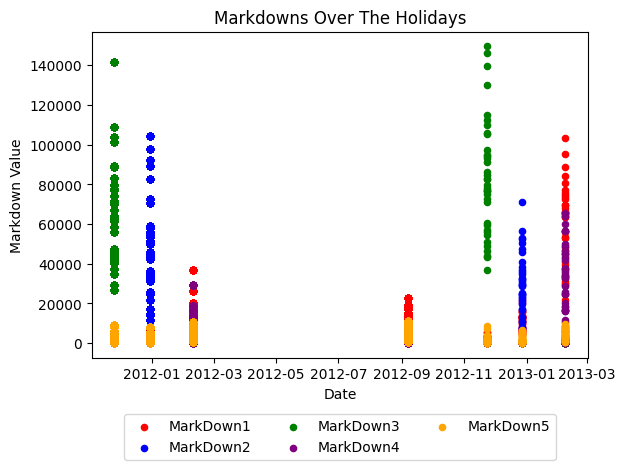

In [18]:
fig, ax = plt.subplots()

# Plotting each markdown series as a scatter plot on the same axes with different colors
holidaysDF.plot.scatter(x="Date", y="MarkDown1", ax=ax, color='red', label='MarkDown1')
holidaysDF.plot.scatter(x="Date", y="MarkDown2", ax=ax, color='blue', label='MarkDown2')
holidaysDF.plot.scatter(x="Date", y="MarkDown3", ax=ax, color='green', label='MarkDown3')
holidaysDF.plot.scatter(x="Date", y="MarkDown4", ax=ax, color='purple', label='MarkDown4')
holidaysDF.plot.scatter(x="Date", y="MarkDown5", ax=ax, color='orange', label='MarkDown5')

# Optionally, add a title and labels
ax.set_title('Markdowns Over The Holidays')
ax.set_xlabel('Date')
ax.set_ylabel('Markdown Value')

# Add a legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Adjust layout to make room for the legend
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()


<center><b><h1 style="font-size: 25px;">Clearly, markdows are only on some days during holidays. We can use this information to compare sales on markdown days and non-markdown days.</h1></b></center><br>

In [19]:
# List of markdown columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Filter rows where any of the markdown columns is greater than 0
holidaysMarkDownDF = holidaysDF[holidaysDF[markdown_columns].gt(0).any(axis=1)]

# Filter rows where any of the markdown columns is equal to 0
holidaysNoMarkDownDF = holidaysDF[holidaysDF[markdown_columns].isna().all(axis=1)]


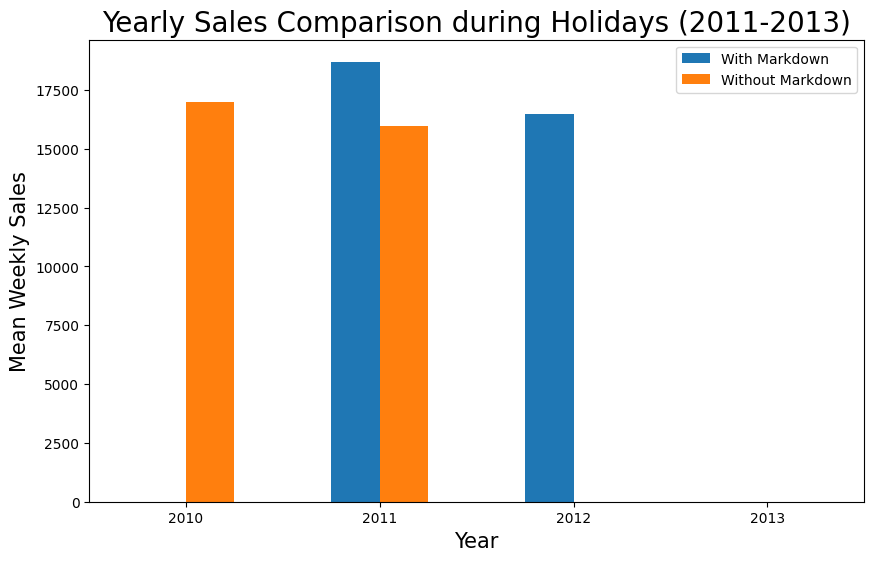

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress specific warnings
warnings.simplefilter(action='ignore', category=Warning)

# Extract the year from the date for both dataframes using .loc to avoid warnings
holidaysMarkDownDF.loc[:, 'Year'] = holidaysMarkDownDF['Date'].dt.year
holidaysNoMarkDownDF.loc[:, 'Year'] = holidaysNoMarkDownDF['Date'].dt.year

# Filter data for years 2011, 2012, and 2013
filtered_markdown = holidaysMarkDownDF[holidaysMarkDownDF['Year'].isin([2010,2011, 2012, 2013])]
filtered_no_markdown = holidaysNoMarkDownDF[holidaysNoMarkDownDF['Year'].isin([2010,2011, 2012, 2013])]

# Aggregate Weekly_Sales by year
sales_markdown = filtered_markdown.groupby('Year')['Weekly_Sales'].mean()
sales_no_markdown = filtered_no_markdown.groupby('Year')['Weekly_Sales'].mean()

# Combine the data into a single dataframe for plotting
combined_sales = pd.DataFrame({'With Markdown': sales_markdown, 'Without Markdown': sales_no_markdown})

# Plotting
combined_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Yearly Sales Comparison during Holidays (2011-2013)', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Mean Weekly Sales', fontsize=15)
plt.xticks(rotation=0)  # Keeping the year labels horizontal for readability
plt.show()


<center><b><h1 style="font-size: 25px;">Clearly markdows do appear to have contributed to sales especially during holidays.</h1></b></center><br>

<b><h1 style="font-size: 25px;">Let's compare sales on markdown days and non-markdown days!</h1></b>

In [21]:
# Group sales and markdowns by date
WeeklyMeanSales = mergedDF.groupby('Date')['Weekly_Sales'].mean()
WeeklyMeanMarkDown = [mergedDF.groupby('Date')['MarkDown1'].mean(),
                     mergedDF.groupby('Date')['MarkDown2'].mean(),
                     mergedDF.groupby('Date')['MarkDown3'].mean(),
                     mergedDF.groupby('Date')['MarkDown4'].mean(),
                     mergedDF.groupby('Date')['MarkDown5'].mean()]

WeeklyMeanSales = WeeklyMeanSales.replace(0, np.nan)


# Replace 0 with NaN in each markdown series in yearlySumMarkDown
WeeklyMeanMarkDown = [md.replace(0, np.nan) for md in WeeklyMeanMarkDown]

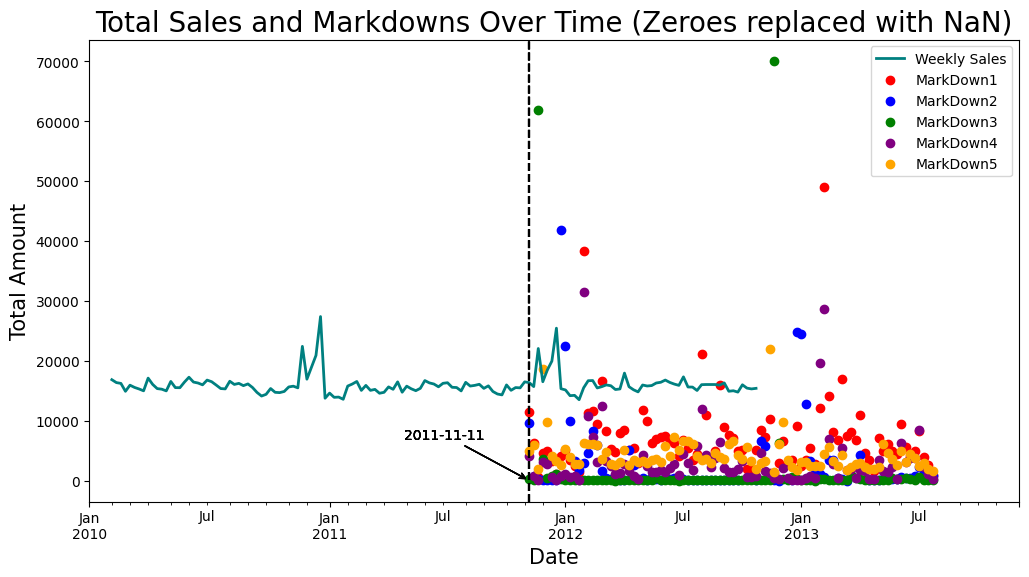

In [22]:
plt.figure(figsize=(12, 6))

# Plot for sales
WeeklyMeanSales.plot(label='Weekly Sales', color='teal', linewidth=2)

# Colors for each markdown
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Plot for each markdown and draw vertical line with annotation
for i, md in enumerate(WeeklyMeanMarkDown):
    # Find the first non-NaN date for this markdown
    start_date = md.first_valid_index()
    
    # Plot markdown as scatter
    plt.scatter(md.index, md, label=f'MarkDown{i+1}', color=colors[i])
    
    # Draw vertical line
    plt.axvline(x=start_date, color='black', linestyle='--')

    # Add annotation for the start date
    plt.annotate(start_date.strftime('%Y-%m-%d'), 
                 xy=(start_date, 0), 
                 xycoords='data', 
                 xytext=(-90, 30), 
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                 color='black')

plt.title('Total Sales and Markdowns Over Time (Zeroes replaced with NaN)',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Total Amount',fontsize=15)
plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2013-12-01'))
plt.legend()
plt.show()

<center><b><h1 style="font-size: 20px;">Since the Markdowns were introduced on Nov 11th 2011, it will be interesting to compare sales before and after.</h1></b></center>

In [23]:
import warnings
import matplotlib.pyplot as plt

# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

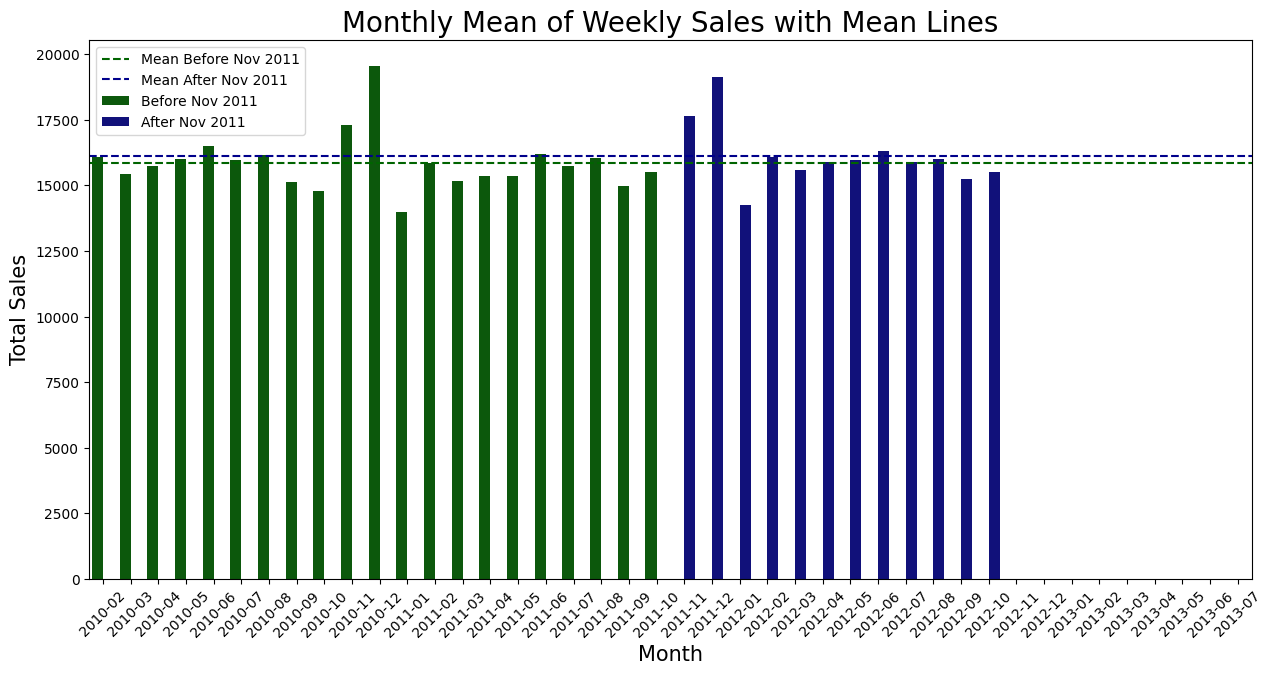

In [24]:
# Resample and sum the sales monthly
monthlySales = mergedDF.resample('M', on='Date')['Weekly_Sales'].mean().reset_index()

# Add a new column to classify data based on the date
monthlySales['Period'] = monthlySales['Date'].apply(lambda x: 'Before Nov 2011' if x < pd.Timestamp('2011-11-01') else 'After Nov 2011')

# Convert 'Date' to a period (for cleaner x-axis labels)
monthlySales['Date'] = monthlySales['Date'].dt.to_period('M')

# Plotting with Seaborn
plt.figure(figsize=(15, 7))
sns.barplot(data=monthlySales, x='Date', y='Weekly_Sales', hue='Period', palette=['darkgreen', 'darkblue'])

# Calculate and plot the means for the two groups
mean_before_nov2011 = monthlySales[monthlySales['Period'] == 'Before Nov 2011']['Weekly_Sales'].mean()
mean_after_nov2011 = monthlySales[monthlySales['Period'] == 'After Nov 2011']['Weekly_Sales'].mean()

plt.axhline(mean_before_nov2011, color='darkgreen', linestyle='--', label='Mean Before Nov 2011')
plt.axhline(mean_after_nov2011, color='darkblue', linestyle='--', label='Mean After Nov 2011')

plt.title('Monthly Mean of Weekly Sales with Mean Lines',fontsize=20)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()

plt.show()


<center><b><h1 style="font-size: 20px;">Clearly the sales have shown an increase after the markdowns have been introduced.</h1></b></center><br>

In [25]:
# Extract year and month
mergedDF['Year'] = mergedDF['Date'].dt.year
mergedDF['Month'] = mergedDF['Date'].dt.month_name()

# Group by year and month, and calculate the mean of sales and markdowns
grouped = mergedDF.groupby(['Year', 'Month'])
monthly_data = grouped[['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean().reset_index()

# Add a column for average markdown
monthly_data['AvgMarkDown'] = monthly_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean(axis=1)

# Define the correct order for the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' to a categorical type with the defined order
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=months_order, ordered=True)

# Sort the data
monthly_data.sort_values(by=['Year', 'Month'], inplace=True)

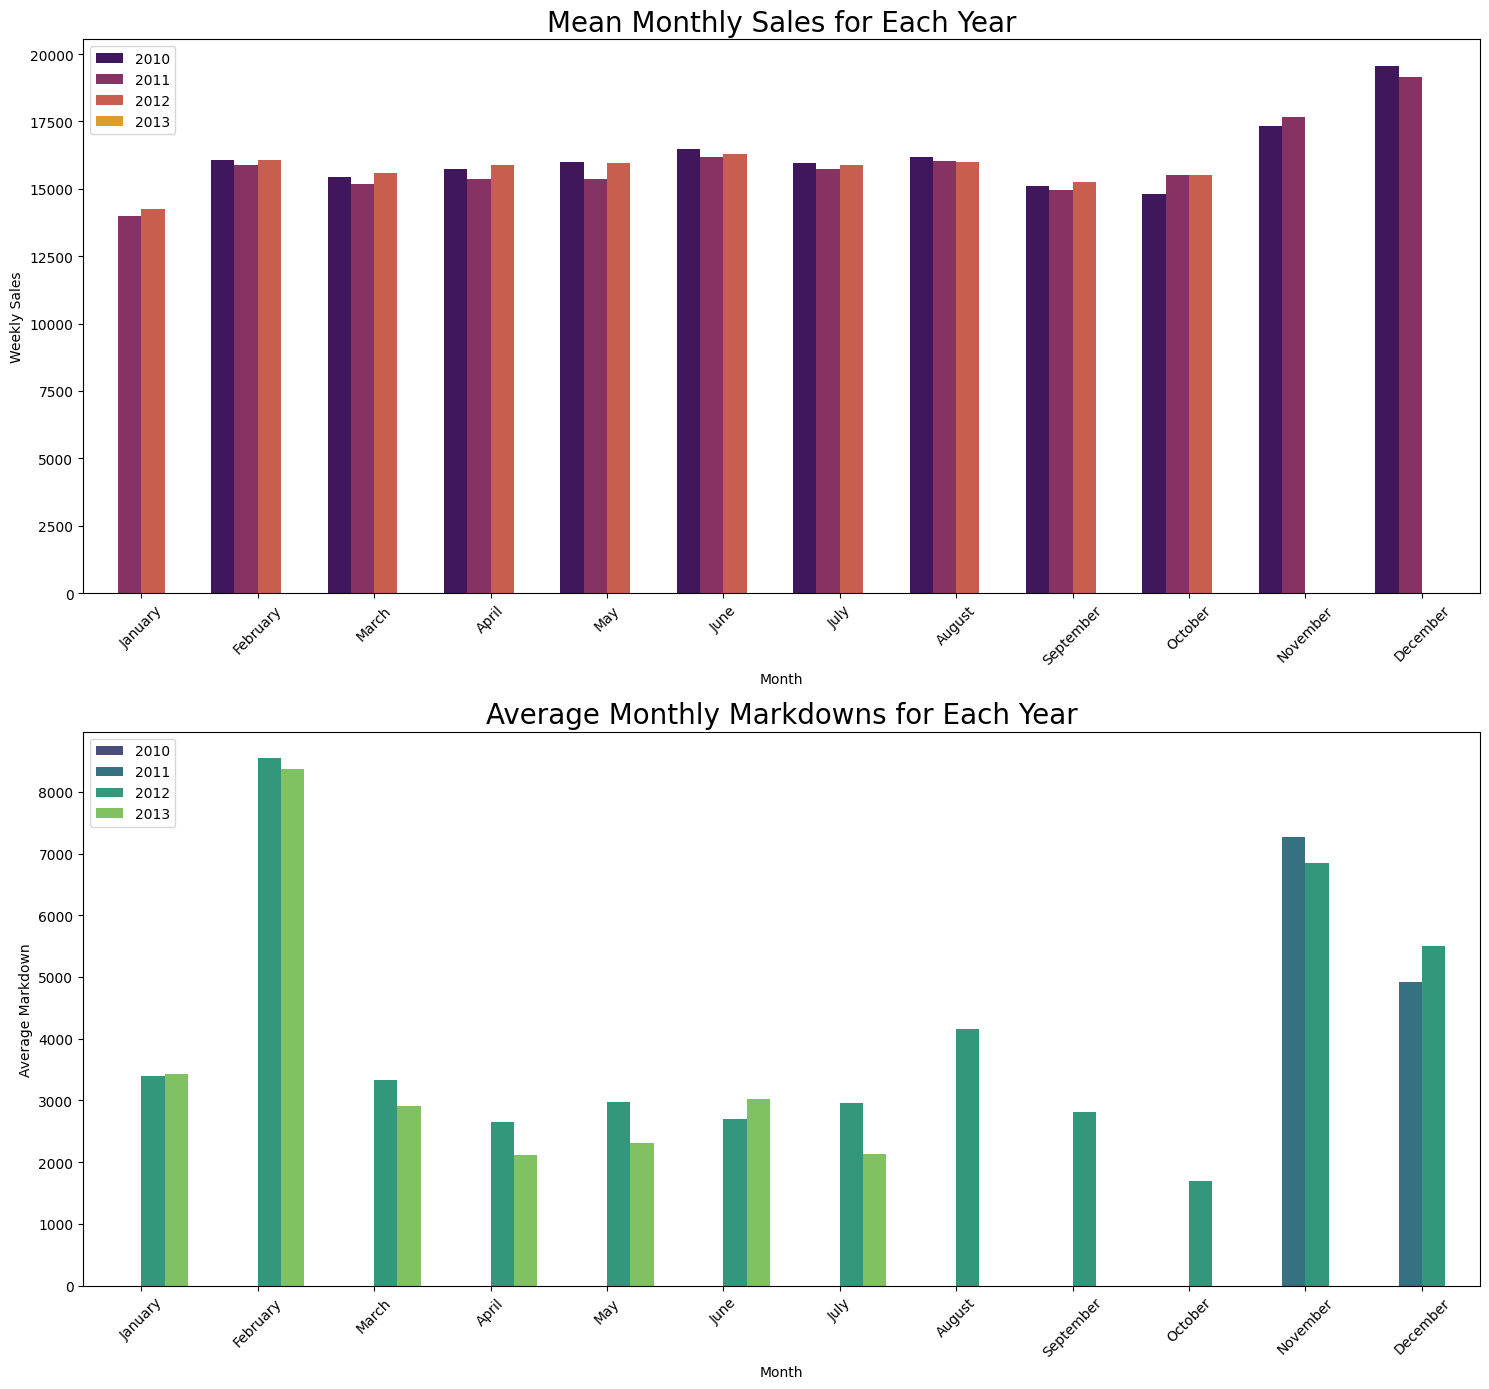

In [26]:
# Create a figure with two subplots, one above the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 14))

# Plotting the sales data on the first subplot
sns.barplot(data=monthly_data, x='Month', y='Weekly_Sales', hue='Year', palette='inferno', ax=ax1)
ax1.set_title('Mean Monthly Sales for Each Year',fontsize = 20)
ax1.set_xlabel('Month')
ax1.set_ylabel('Weekly Sales')
ax1.legend(loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# Plotting the markdown data on the second subplot
sns.barplot(data=monthly_data, x='Month', y='AvgMarkDown', hue='Year', palette='viridis', ax=ax2)
ax2.set_title('Average Monthly Markdowns for Each Year',fontsize = 20)
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Markdown')
ax2.legend(loc='upper left')
ax2.tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()

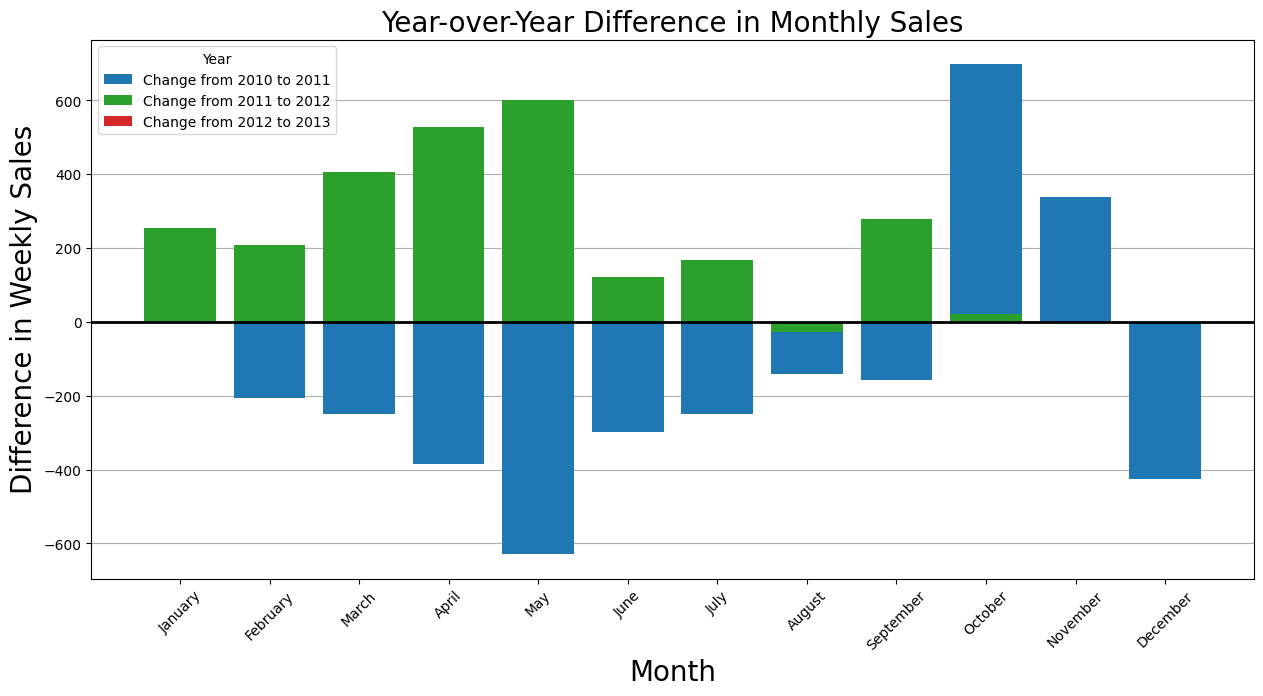

In [27]:
# Pivot the data to have years as columns and months as rows
pivot_sales = monthly_data.pivot(index='Month', columns='Year', values='Weekly_Sales')

# Calculate the year-over-year difference
yearly_diff = pivot_sales.diff(axis=1)

# Drop the first column as it will be NaN due to the diff operation
yearly_diff = yearly_diff.iloc[:, 1:]

# Reset index to flatten the DataFrame for plotting
yearly_diff = yearly_diff.reset_index().melt(id_vars='Month', var_name='Year', value_name='SalesDifference')

# Create the plot
plt.figure(figsize=(15, 7))
# Define the palette
palette = ['tab:blue', 'tab:green', 'tab:red']

# Plotting each set of bars
for i, year in enumerate(yearly_diff['Year'].unique()):
    # Filter the data for each year
    data = yearly_diff[yearly_diff['Year'] == year]
    plt.bar(data['Month'], data['SalesDifference'], color=palette[i], label=f'Change from {year-1} to {year}',zorder=2)

plt.axhline(y=0, color='black', linewidth=2)   
    
plt.title('Year-over-Year Difference in Monthly Sales',fontsize = 20)
plt.xlabel('Month',fontsize = 20)
plt.ylabel('Difference in Weekly Sales',fontsize = 20)
plt.xticks(rotation=45)
plt.grid(axis='y',zorder=0)

# Adding the legend
plt.legend(title='Year', loc='upper left')
plt.show()

<div style="font-size: 15px;">
    <ul>
        <li><b>This figure shows that after the introduction of markdowns since Nov 2011, there has been a steady increase in sales each month.</b></li>
        <br>
        <li><b>However, the sales in December 2011 were lower than December 2010 despite the introduction of markdowns.</b></li>
        <br>
        <li><b>The most significant impact of markdows is seen between January 2012 to May 2012 where sales have increased each                 month compared to the previous year when it decreased.
         </b></li>
        <br>
        <li><b>It appears that markdowns have a greater impact during non-Holiday periods like December.</b></li>  
        <br>
    </ul>
</div>

<center><b><h1 style="font-size: 30px;"><u>Performance of the top stores and departments</u></h1></b></center><br>

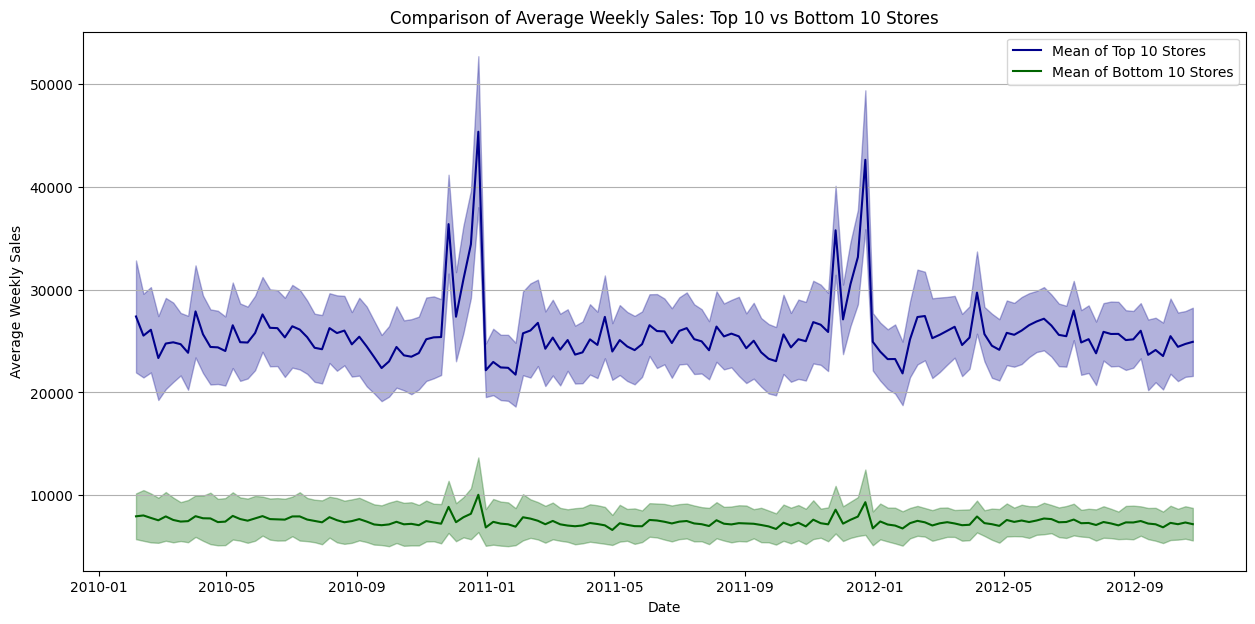

In [28]:
# Group by 'Store' and 'Date' and calculate the mean of 'Weekly_Sales'
grouped_data = mergedDF.groupby(['Store', 'Date'])['Weekly_Sales'].mean().reset_index()

top_10_stores = rankedStores.nlargest(10).index.tolist()
bottom_10_stores = rankedStores.nsmallest(10).index.tolist()

# Function to calculate mean and standard deviation for a list of stores
def calculate_stats(store_list):
    store_data = grouped_data[grouped_data['Store'].isin(store_list)]
    return store_data.groupby('Date')['Weekly_Sales'].agg(['mean', 'std'])

# Calculate stats for top 10 and bottom 10 stores
top_10_stats = calculate_stats(top_10_stores)
bottom_10_stats = calculate_stats(bottom_10_stores)

# Plotting
plt.figure(figsize=(15, 7))

# Top 10 store
plt.plot(top_10_stats.index, top_10_stats['mean'], label='Mean of Top 10 Stores', color='darkblue')
plt.fill_between(top_10_stats.index, 
                 top_10_stats['mean'] - top_10_stats['std'], 
                 top_10_stats['mean'] + top_10_stats['std'], 
                 color='darkblue', alpha=0.3)

# Bottom 10 stores
plt.plot(bottom_10_stats.index, bottom_10_stats['mean'], label='Mean of Bottom 10 Stores', color='darkgreen')
plt.fill_between(bottom_10_stats.index, 
                 bottom_10_stats['mean'] - bottom_10_stats['std'], 
                 bottom_10_stats['mean'] + bottom_10_stats['std'], 
                 color='darkgreen', alpha=0.3)

plt.title('Comparison of Average Weekly Sales: Top 10 vs Bottom 10 Stores')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.legend()
plt.grid(axis='y')
plt.show()


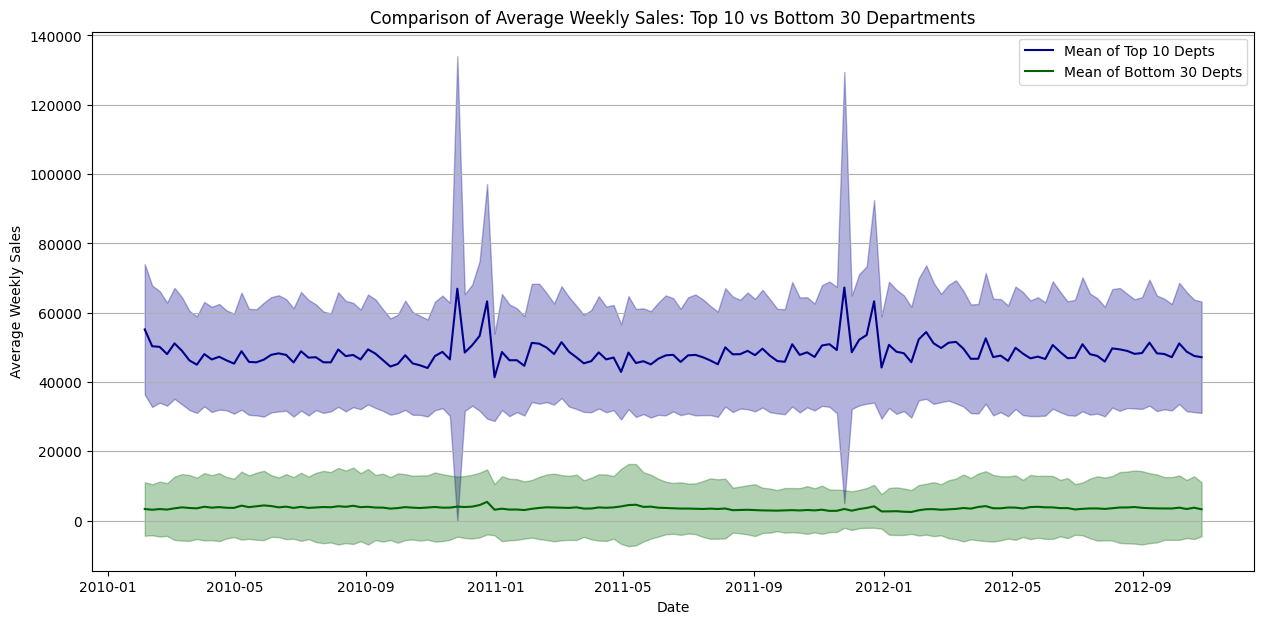

In [29]:
# Group by 'Store' and 'Date' and calculate the mean of 'Weekly_Sales'
grouped_data = mergedDF.groupby(['Dept', 'Date'])['Weekly_Sales'].mean().reset_index()

top_10_stores = rankedDepts.nlargest(10).index.tolist()
bottom_10_stores = rankedDepts.nsmallest(30).index.tolist()

# Function to calculate mean and standard deviation for a list of stores
def calculate_stats(store_list):
    store_data = grouped_data[grouped_data['Dept'].isin(store_list)]
    return store_data.groupby('Date')['Weekly_Sales'].agg(['mean', 'std'])

# Calculate stats for top 10 and bottom 10 stores
top_10_stats = calculate_stats(top_10_stores)
bottom_10_stats = calculate_stats(bottom_10_stores)

# Plotting
plt.figure(figsize=(15, 7))

# Top 10 stores
plt.plot(top_10_stats.index, top_10_stats['mean'], label='Mean of Top 10 Depts', color='darkblue')
plt.fill_between(top_10_stats.index, 
                 top_10_stats['mean'] - top_10_stats['std'], 
                 top_10_stats['mean'] + top_10_stats['std'], 
                 color='darkblue', alpha=0.3)

# Bottom 10 stores
plt.plot(bottom_10_stats.index, bottom_10_stats['mean'], label='Mean of Bottom 30 Depts', color='darkgreen')
plt.fill_between(bottom_10_stats.index, 
                 bottom_10_stats['mean'] - bottom_10_stats['std'], 
                 bottom_10_stats['mean'] + bottom_10_stats['std'], 
                 color='darkgreen', alpha=0.3)

plt.title('Comparison of Average Weekly Sales: Top 10 vs Bottom 30 Departments')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.legend()
plt.grid(axis='y')
plt.show()


<b><h1 style="font-size: 25px;">Let's look at the top 10 stores and what impacted the performance!</h1></b>

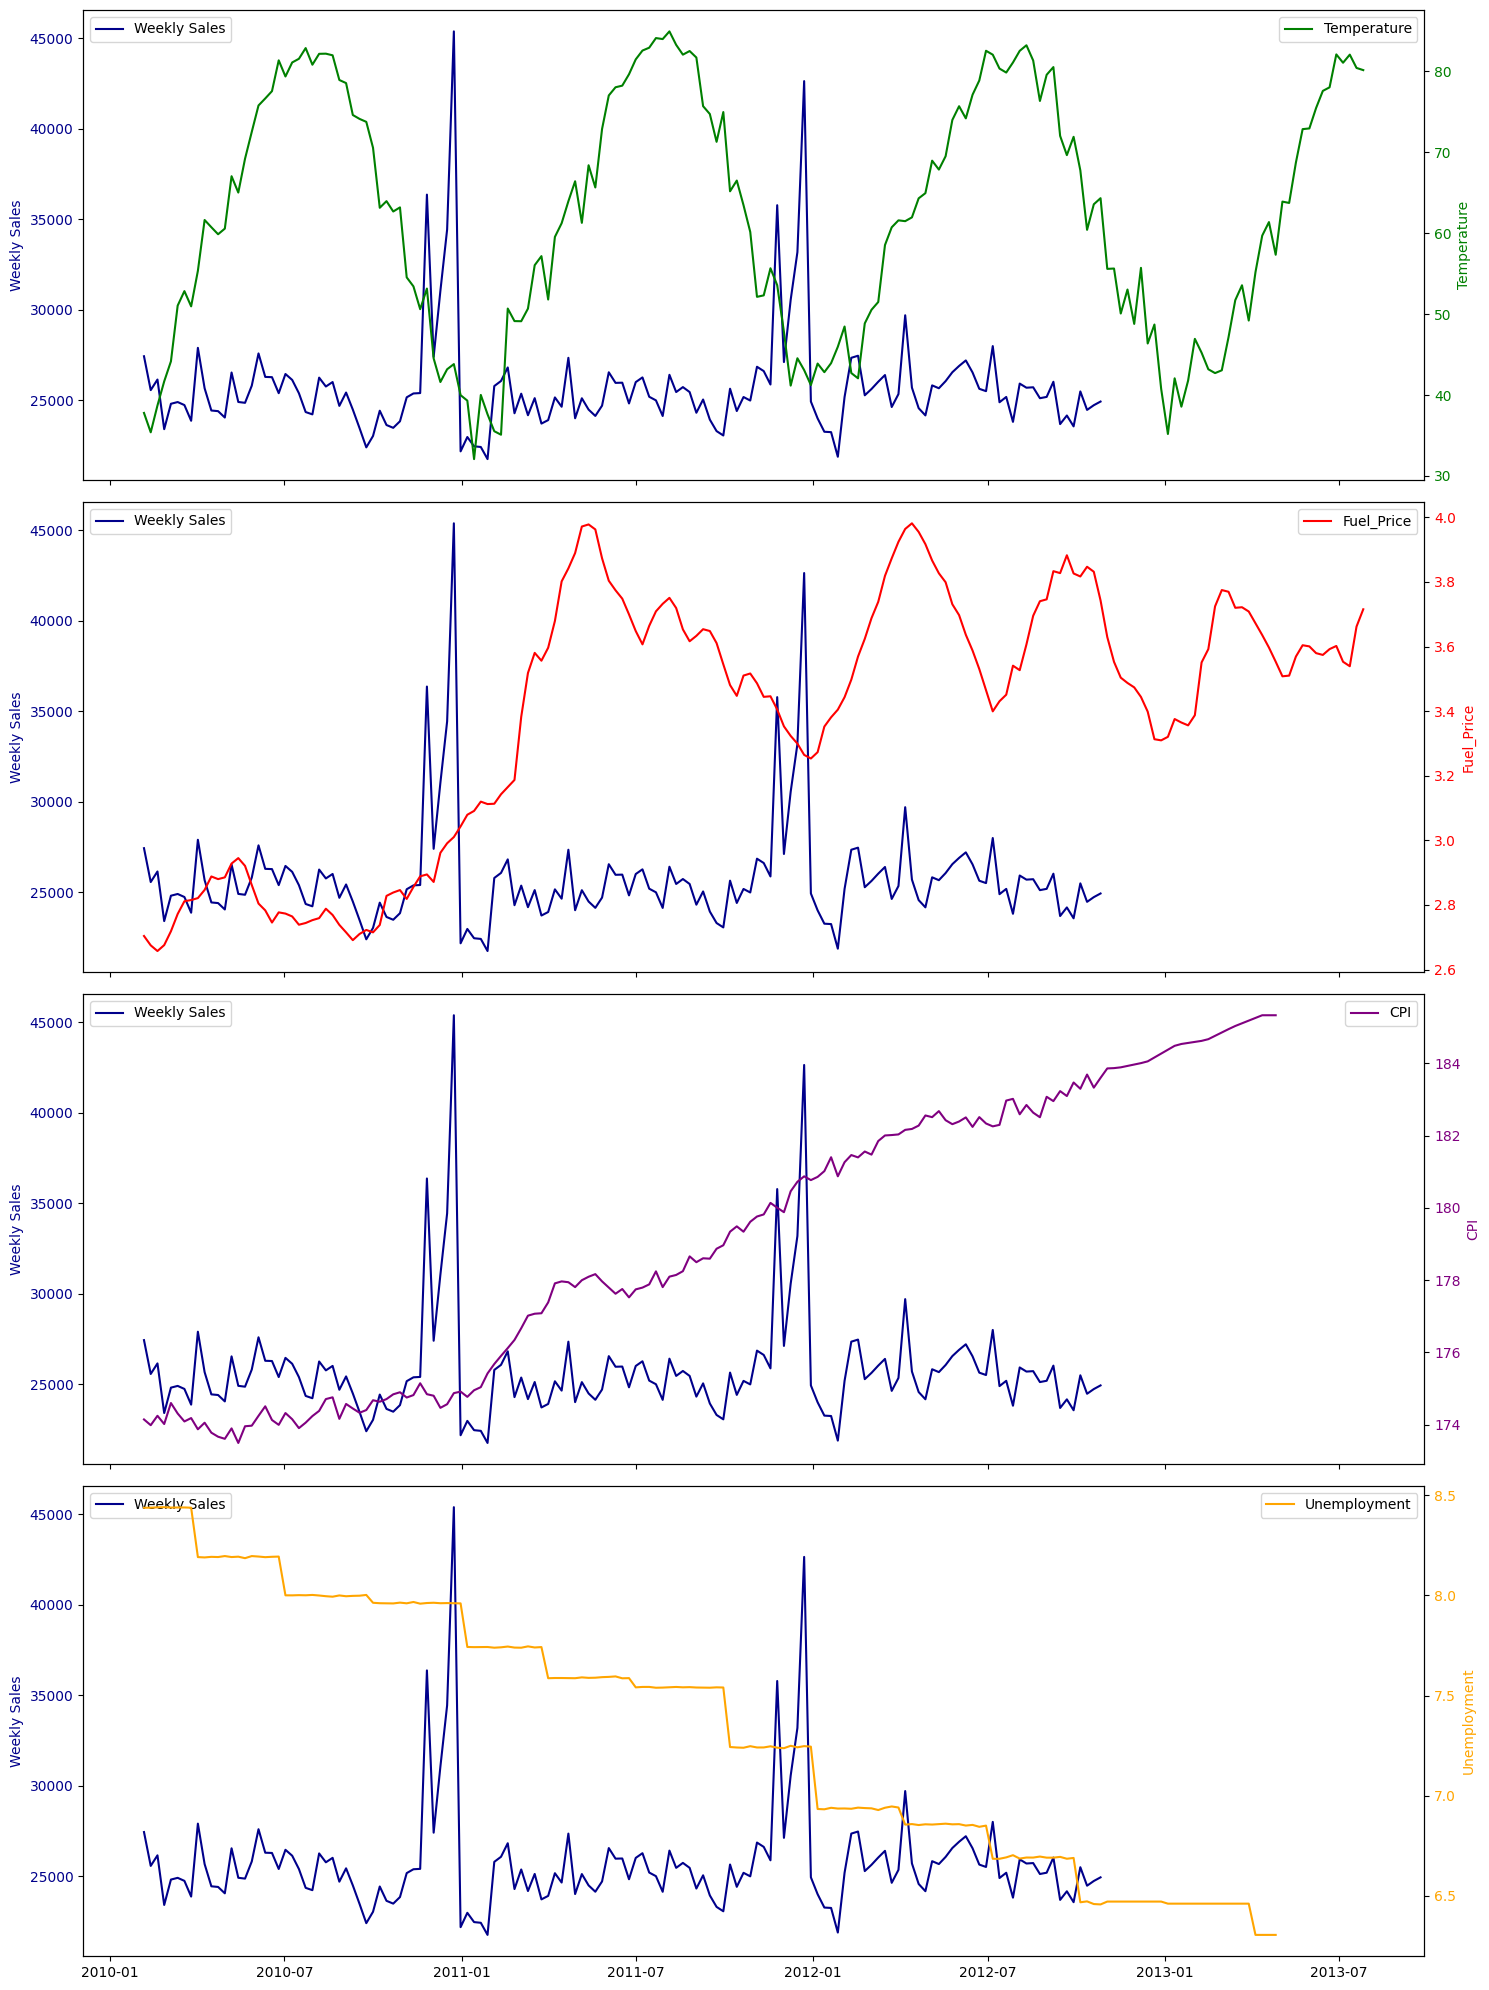

In [30]:
# Filter data for top 10 stores
top_10_stores = rankedStores.nlargest(10).index.tolist()
top_10_data = mergedDF[mergedDF['Store'].isin(top_10_stores)]

# Group by 'Date' and calculate the mean for the necessary columns
grouped_data = top_10_data.groupby('Date')[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].mean().reset_index()

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20), sharex=True)

# List of columns to pair with 'Weekly_Sales' and their colors
columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
colors = ['green', 'red', 'purple', 'orange']

for i, col in enumerate(columns):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # Weekly Sales plot
    ax1.plot(grouped_data['Date'], grouped_data['Weekly_Sales'], color='darkblue', label='Weekly Sales')
    ax1.set_ylabel('Weekly Sales', color='darkblue')
    ax1.tick_params(axis='y', labelcolor='darkblue')
    
    # Other column plot
    ax2.plot(grouped_data['Date'], grouped_data[col], color=colors[i], label=col)
    ax2.set_ylabel(col, color=colors[i])
    ax2.tick_params(axis='y', labelcolor=colors[i])

    # Adding legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

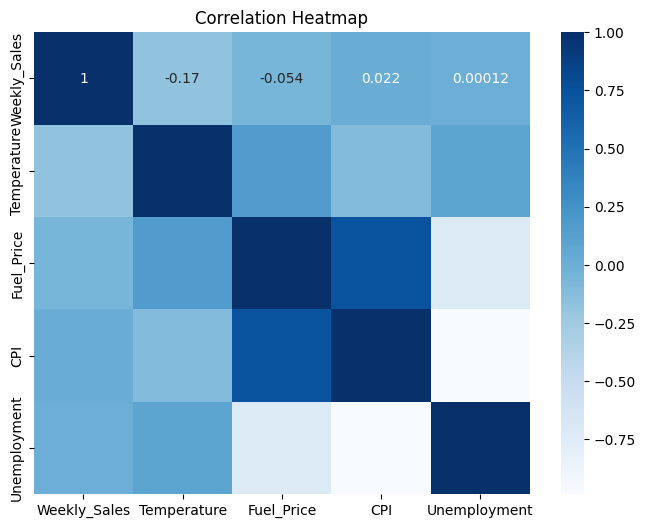

In [31]:
# Correlation heatmap
corr = grouped_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

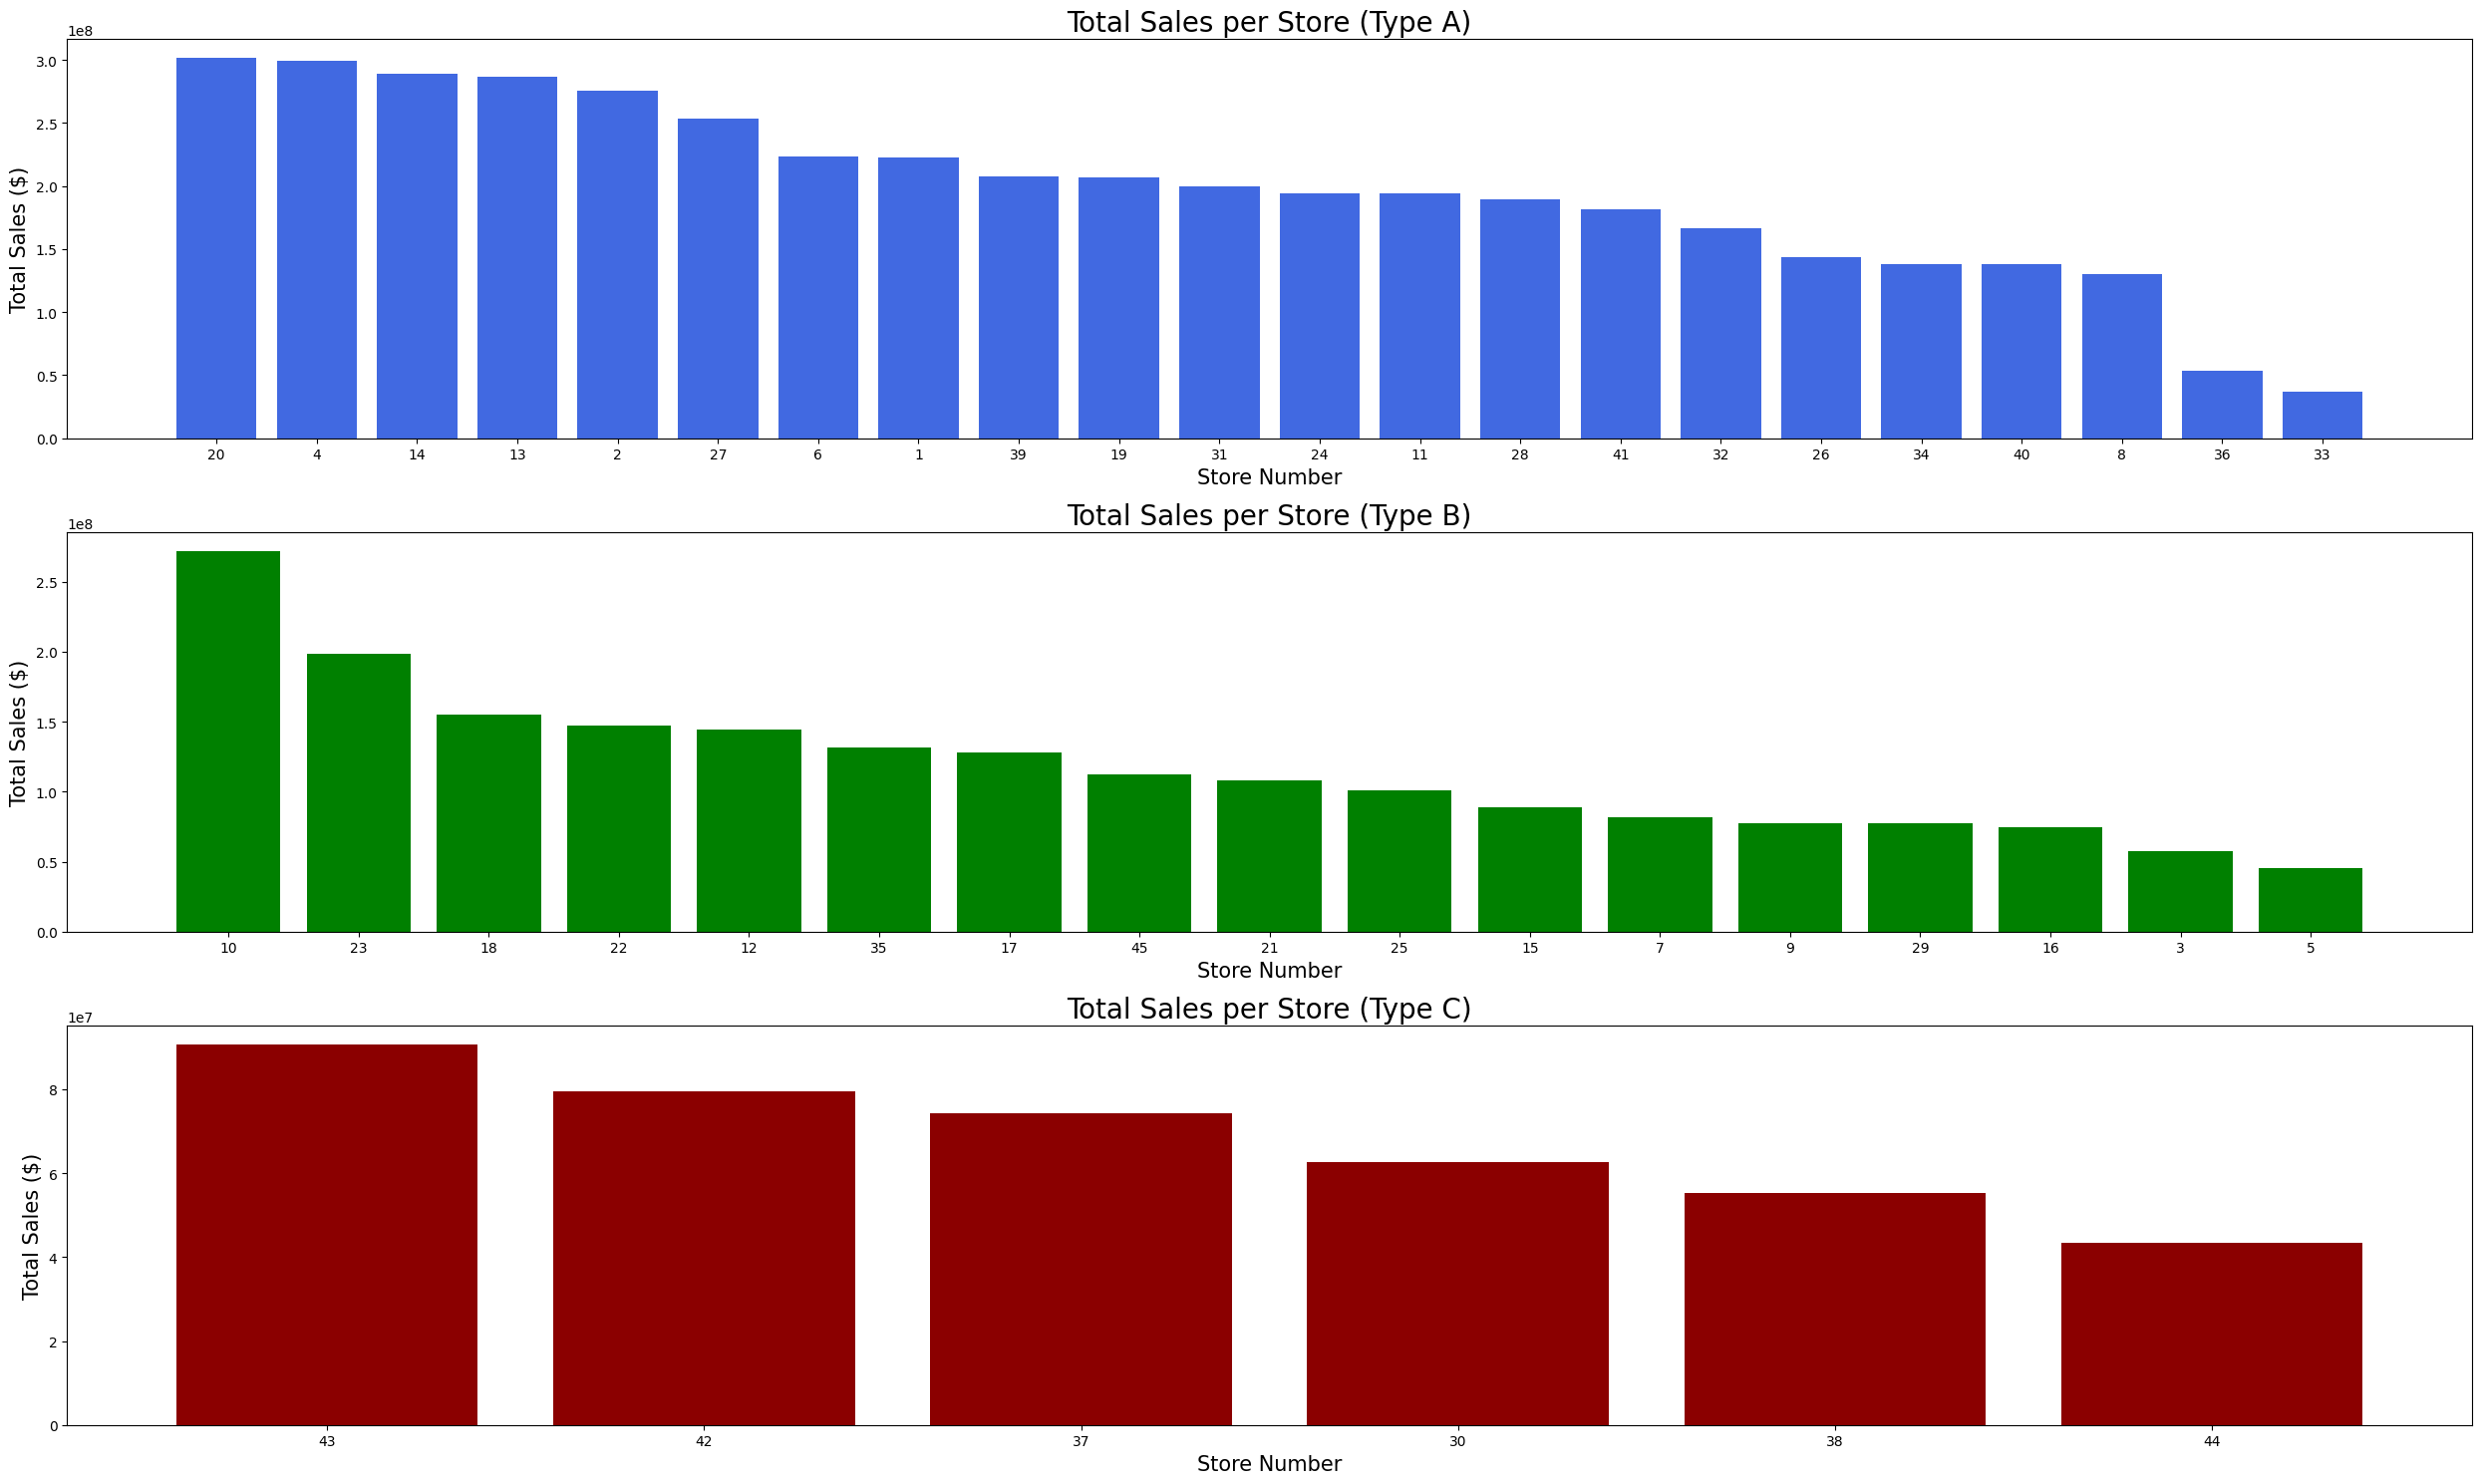

In [32]:
storesA = mergedDF[mergedDF['Type']=='A']
storesB = mergedDF[mergedDF['Type']=='B']
storesC = mergedDF[mergedDF['Type']=='C']

# Aggregate sales data at the store level for each type
totalSales_A = storesA.groupby('Store')['Weekly_Sales'].sum()
totalSales_B = storesB.groupby('Store')['Weekly_Sales'].sum()
totalSales_C = storesC.groupby('Store')['Weekly_Sales'].sum()

# Sort the stores within each type based on total sales in descending order
rankedStores_A = totalSales_A.sort_values(ascending=False)
rankedStores_B = totalSales_B.sort_values(ascending=False)
rankedStores_C = totalSales_C.sort_values(ascending=False)

# Define colors for each store type
type_colors = {'A': 'royalblue', 'B': 'green', 'C': 'darkred'}

# Create individual bar plots for each store type
plt.figure(figsize=(25, 15))

# Plot for Type A
plt.subplot(311)
plt.bar(range(len(rankedStores_A)), rankedStores_A.values, color=type_colors['A'])
plt.title('Total Sales per Store (Type A)',fontsize = 20)
plt.xlabel('Store Number',fontsize = 15)
plt.ylabel('Total Sales ($)',fontsize = 15)

# Set x-axis labels to store numbers for all types
xticks_labels = rankedStores_A.index.tolist()  # Use store numbers from Type A
plt.xticks(range(len(xticks_labels)),xticks_labels)


# Plot for Type B
plt.subplot(312)
plt.bar(range(len(rankedStores_B)), rankedStores_B.values, color=type_colors['B'])
plt.title('Total Sales per Store (Type B)',fontsize = 20)
plt.xlabel('Store Number',fontsize = 15)
plt.ylabel('Total Sales ($)',fontsize = 15)

# Set x-axis labels to store numbers for all types
xticks_labels = rankedStores_B.index.tolist()  # Use store numbers from Type B
plt.xticks(range(len(xticks_labels)),xticks_labels)


# Plot for Type C
plt.subplot(313)
plt.bar(range(len(rankedStores_C)), rankedStores_C.values, color=type_colors['C'])
plt.title('Total Sales per Store (Type C)', fontsize = 20)
plt.xlabel('Store Number',fontsize = 15)
plt.ylabel('Total Sales ($)',fontsize = 15)

# Set x-axis labels to store numbers for all types
xticks_labels = rankedStores_C.index.tolist()  # Use store numbers from Type C
plt.xticks(range(len(xticks_labels)),xticks_labels)

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

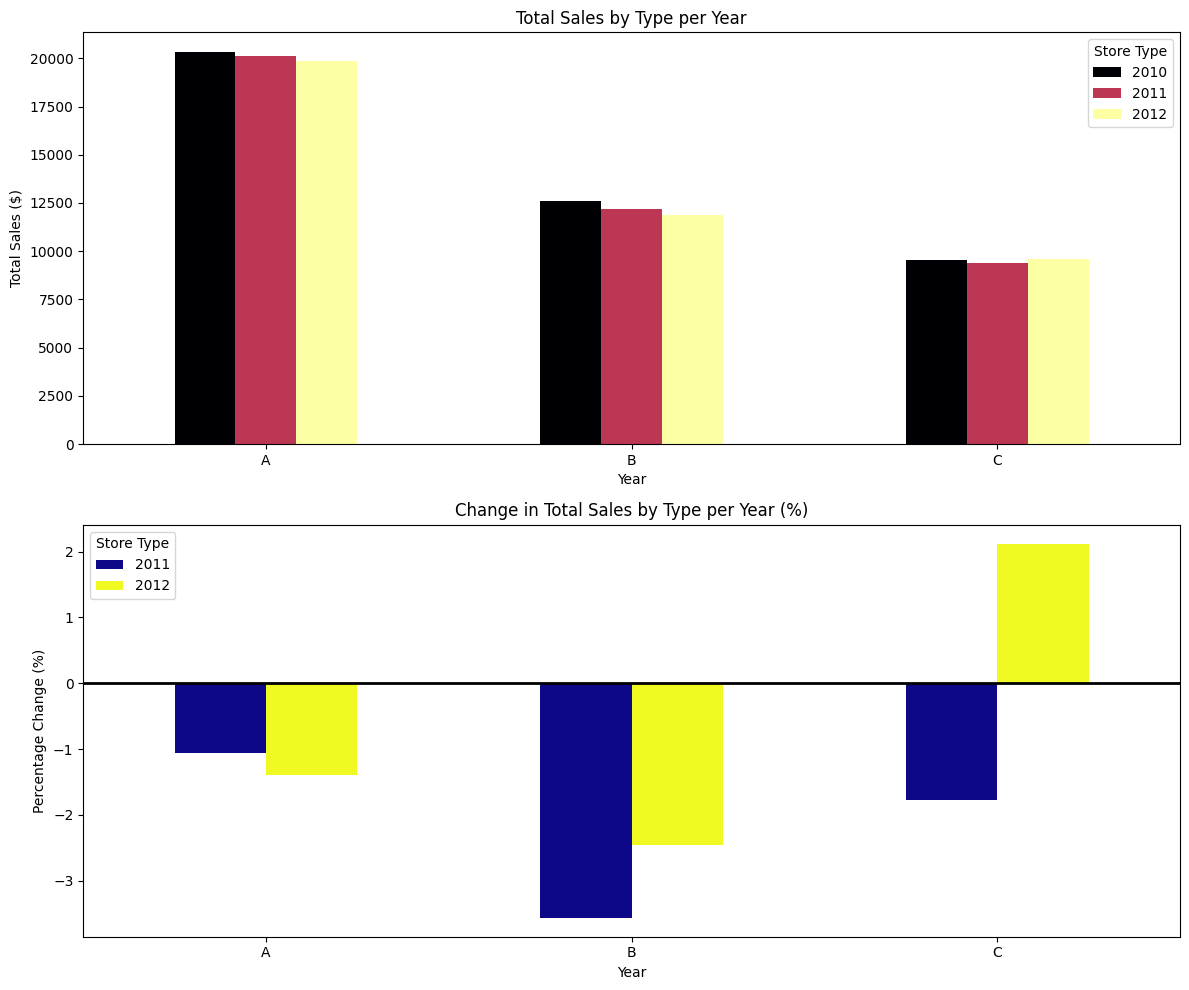

In [33]:
# Filter the DataFrame to exclude the year 2013
filteredDF = mergedDF[mergedDF['Year'] != 2013]

# Aggregate sales data at the store level for each type
totalSales_by_type_year = filteredDF.groupby(['Type', 'Year'])['Weekly_Sales'].mean().unstack()
totalSales_change_by_type_year = totalSales_by_type_year.pct_change(axis=1) * 100  # Calculate percentage change
totalSales_change_by_type_year = totalSales_change_by_type_year.drop(columns=2010)
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot total sales by type per year
totalSales_by_type_year.plot(kind='bar', ax=axes[0], colormap='inferno', rot=0)
axes[0].set_title('Total Sales by Type per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Sales ($)')
axes[0].legend(title='Store Type')

# Plot change in total sales by type per year
totalSales_change_by_type_year.plot(kind='bar', ax=axes[1], colormap='plasma', rot=0)
axes[1].set_title('Change in Total Sales by Type per Year (%)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Percentage Change (%)')
axes[1].legend(title='Store Type')
axes[1].axhline(y=0, linewidth=2,color='k')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

<b><h1 style="font-size: 22px;">So the stores of Type A have the highest amount of sales every year, followed by stores B and C. Also, store types A and B experienced drop in sales while store C had an increase of 2% sales from 2011 to 2012.</h1></b>

<center><b><h1 style="font-size: 30px;"><u>Reasons for the drop in sales between 2011 to 2012.</u></h1></b></center><br>

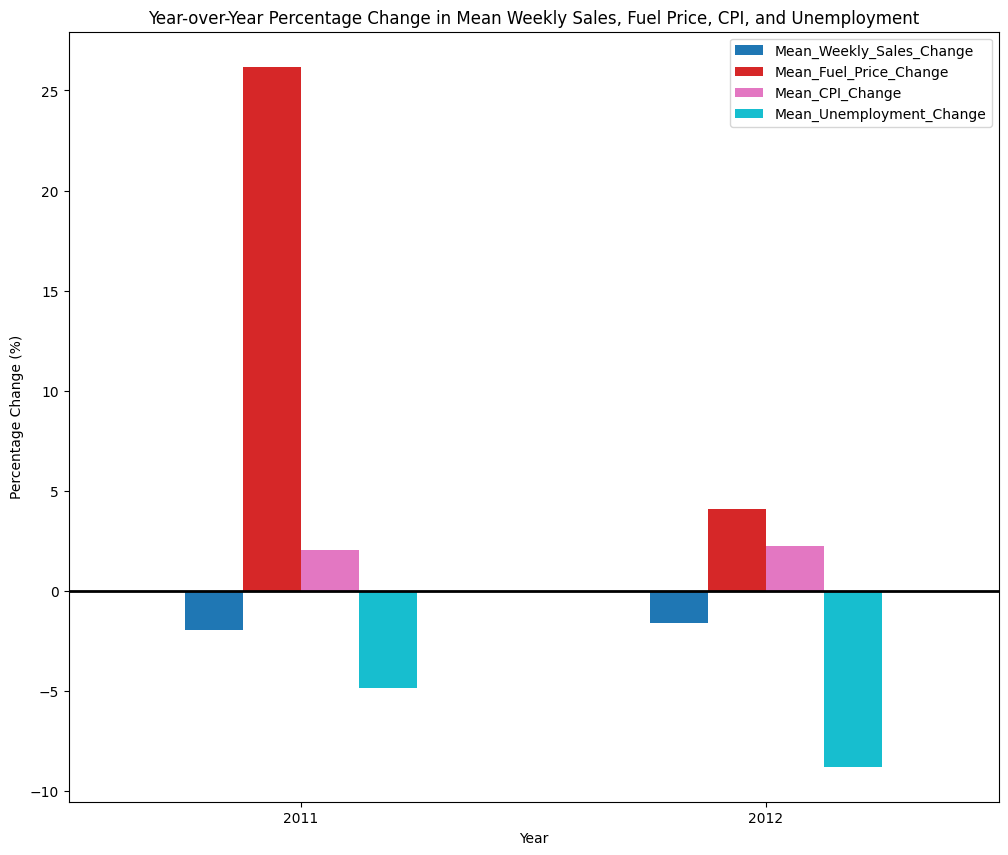

In [34]:
# Group by 'Year' and calculate the mean for the columns
yearly_mean_data = mergedDF.groupby('Year')[['Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment']].mean()

yearly_change_data = pd.DataFrame()

# Calculate year-over-year percentage change for the columns
yearly_change_data['Mean_Weekly_Sales_Change'] = yearly_mean_data['Weekly_Sales'].pct_change() * 100
yearly_change_data['Mean_Fuel_Price_Change'] = yearly_mean_data['Fuel_Price'].pct_change() * 100
yearly_change_data['Mean_CPI_Change'] = yearly_mean_data['CPI'].pct_change() * 100
yearly_change_data['Mean_Unemployment_Change'] = yearly_mean_data['Unemployment'].pct_change() * 100

# Reset the index to make 'Year' a column
yearly_mean_data = yearly_mean_data.reset_index()

yearly_change_data = yearly_change_data.drop([2010, 2013])

# Create separate bar plots for percentage changes
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
yearly_change_data.plot(kind='bar', ax=axes, colormap='tab10',rot=0)
axes.set_title('Year-over-Year Percentage Change in Mean Weekly Sales, Fuel Price, CPI, and Unemployment')
axes.set_xlabel('Year')
axes.set_ylabel('Percentage Change (%)')
axes.axhline(y=0, linewidth=2,color='k')
plt.legend()
plt.show()


<center><b><h1 style="font-size: 22px;">We see that with the drop in unemployment and increase in CPI as well as the introduction of markdowns, the drop in weekly changes reduced between 2011 and 2012.</h1></b></center>

<center><b><h1 style="font-size: 32px;color: red"><u>Predicting future sales</u></h1></b></center><br>

## 1. Understanding Seasonality:

<Axes: xlabel='Year'>

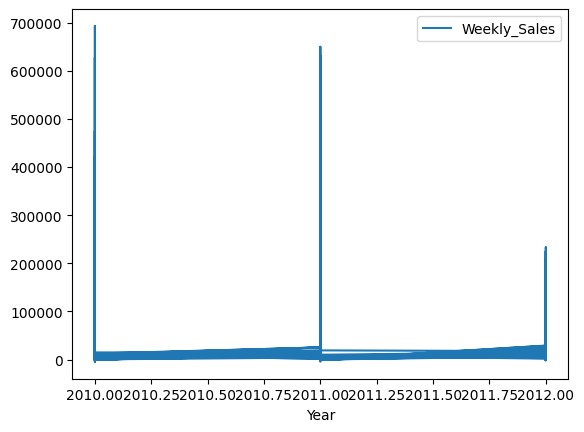

In [35]:
# Selecting columns 'Weekly_Sales' and 'Year' from mergedDF
df = mergedDF[['Weekly_Sales', 'Year']]

# Setting 'Year' as the index
df.set_index('Year', inplace=True)

df.plot()

<Figure size 1200x600 with 0 Axes>

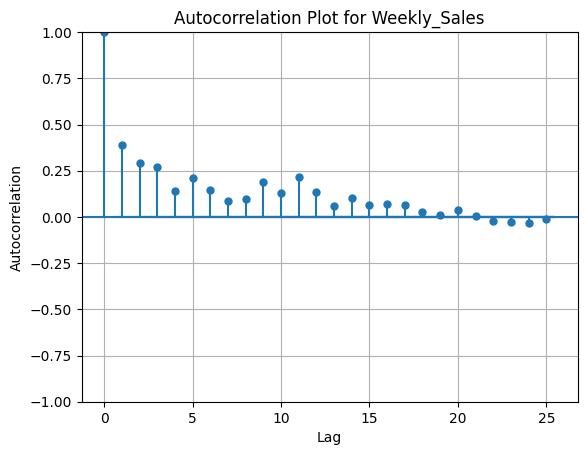

<Figure size 1200x600 with 0 Axes>

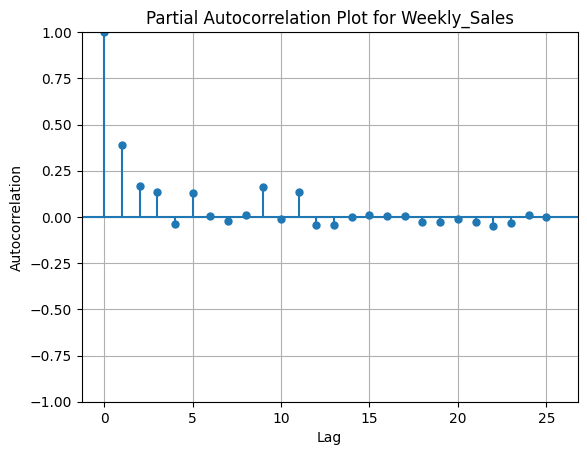

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

mergedDF.dropna(inplace=True)

# Step 2: Create a time series DataFrame
# Set the 'Date' column as the index
ts_df = mergedDF.set_index('Date')

# Step 3: Plot the autocorrelation function (ACF) for Weekly_Sales
plt.figure(figsize=(12, 6))
plot_acf(ts_df['Weekly_Sales'], lags=25)
plt.title("Autocorrelation Plot for Weekly_Sales")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

# Step 3: Plot the partial autocorrelation function (ACF) for Weekly_Sales
plt.figure(figsize=(12, 6))
plot_pacf(ts_df['Weekly_Sales'], lags=25)
plt.title("Partial Autocorrelation Plot for Weekly_Sales")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

## Based on the autocorrelation plot, we see that 1st day and 2nd day correlations are high.

<center><b><h1 style="font-size: 30px;"><u>Differencing the data</u></h1></b></center><br>

In [37]:
# Lag the "Weekly_Sales" column by one day
mergedDF['Lagged_Weekly_Sales'] = mergedDF['Weekly_Sales'].shift(1)

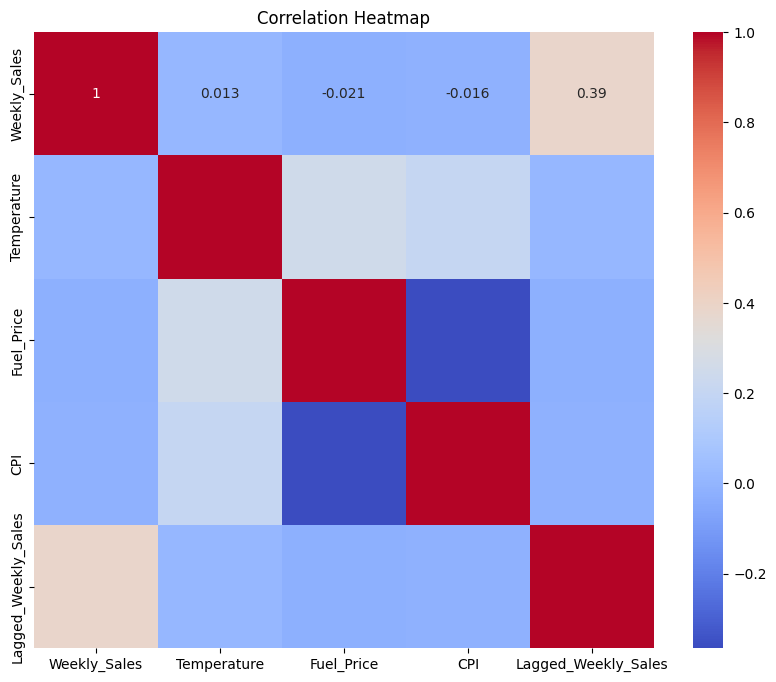

In [38]:
# Correlation heatmap
corr = mergedDF[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Lagged_Weekly_Sales']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## We see that among the other available variables, the 1-Day lagged sales has the best correlation.

<center><b><h1 style="font-size: 35px;"><u>Linear Regression</u></h1></b></center><br>

In [40]:
from sklearn.linear_model import LinearRegression

X = mergedDF.loc[:, ['Lagged_Weekly_Sales']].dropna()  # features
y = mergedDF.loc[:, 'Weekly_Sales']  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

X = X/1e3;
y = y/1e3;

# Train the model
model = LinearRegression()
model.fit(X, y)

y_pred =  pd.Series(model.predict(X), index=X.index)

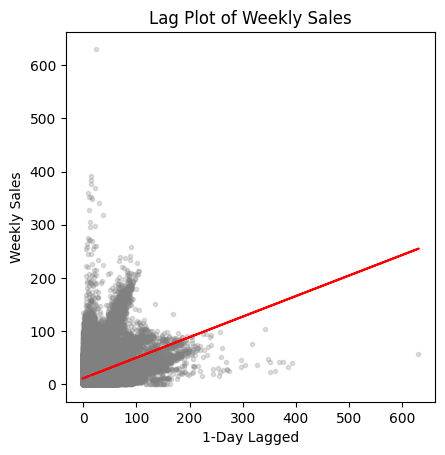

In [41]:
fig, ax = plt.subplots()
ax.plot(X['Lagged_Weekly_Sales'], y, '.', color='gray',alpha=0.25)
ax.plot(X['Lagged_Weekly_Sales'], y_pred,color='red')
ax.set(aspect='equal', ylabel='Weekly Sales', xlabel='1-Day Lagged', title='Lag Plot of Weekly Sales');

<b><h1 style="font-size: 25px;">Let us try to calculate for a monthly average data!</h1></b>

<Figure size 1200x600 with 0 Axes>

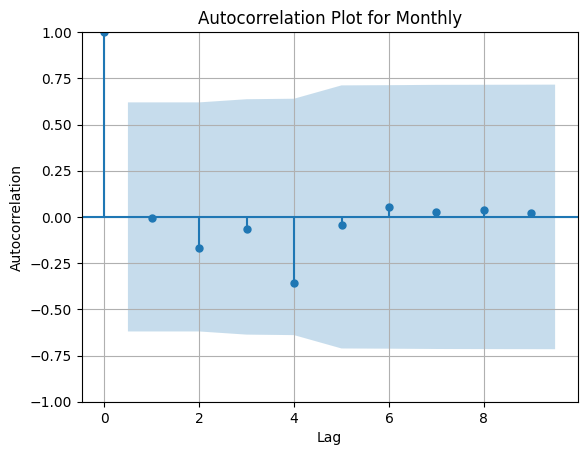

<Figure size 1200x600 with 0 Axes>

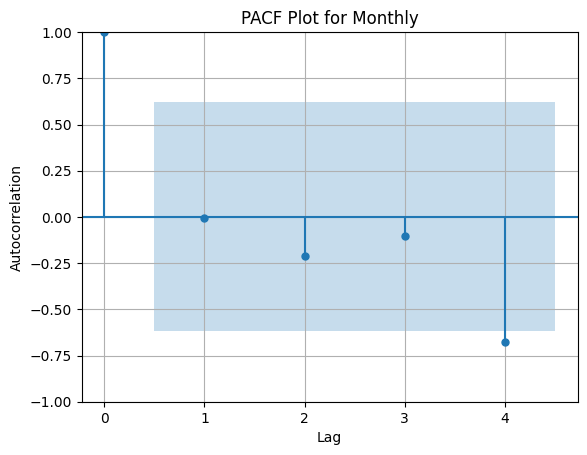

In [59]:
# Using the previous monthlySales dataFrame

df1 = monthlySales.dropna()
plt.figure(figsize=(12, 6))
n_lags = min(15, len(df1['Weekly_Sales']) - 1)
plot_acf(df1['Weekly_Sales'],lags = n_lags)
plt.title("Autocorrelation Plot for Monthly")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

n_lags = min(4, len(df1['Weekly_Sales']) - 1)
df1 = monthlySales.dropna()
plt.figure(figsize=(12, 6))
plot_pacf(df1['Weekly_Sales'],lags = n_lags)
plt.title("PACF Plot for Monthly")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

In [60]:
monthlySales = mergedDF.resample('M', on='Date')['Weekly_Sales'].mean().reset_index()
monthlySales['Date_Numeric'] = (monthlySales['Date'] - monthlySales['Date'].min()).dt.days

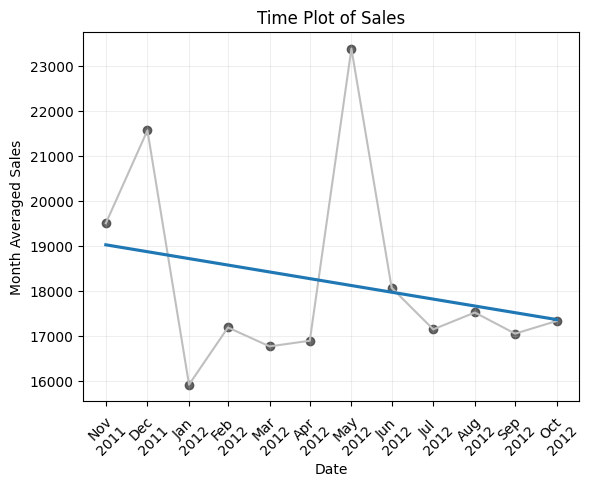

In [61]:
fig, ax = plt.subplots()

# Plot a line plot
ax.plot('Date_Numeric', 'Weekly_Sales', data=monthlySales, color='0.75')

# Add a regression plot onto the same ax without overwriting it
sns.regplot(x='Date_Numeric', y='Weekly_Sales', data=monthlySales, ci=None, scatter_kws={"color": "0.25"}, ax=ax)

ax.set_title('Time Plot of Sales')


# Set x-ticks
ax.set_xticks(monthlySales['Date_Numeric'])  # This sets ticks at the positions of Date_Numeric

# Format x-tick labels to display as month and year
ax.set_xticklabels([date.strftime('%b\n%Y') for date in monthlySales['Date']])

ax.set_xlabel('Date')
ax.set_ylabel('Month Averaged Sales')

plt.grid(True,alpha=0.2)
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()

<center><b><h1 style="font-size: 30px;">Applying a simple moving average to the monthly data.</h1></b></center><br>

In [62]:
monthlySales.set_index('Date', inplace=True)

# Calculate the 3-period SMA
monthlySales['SMA_3'] = monthlySales['Weekly_Sales'].rolling(window=3).mean()

# Forecast the next period's sales (this will be NaN as it's a forecast)
next_period_forecast = monthlySales['SMA_3'].iloc[-1]

print(f"The forecast for Nov 2013 sales is {next_period_forecast}")



The forecast for Nov 2013 sales is 17310.805143523943


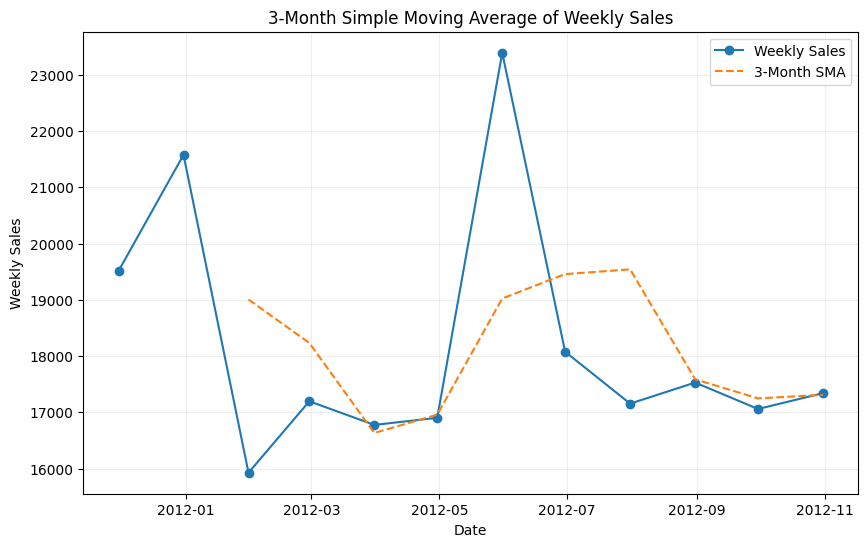

In [63]:
# Plotting the moving average along with the original sales data
plt.figure(figsize=(10, 6))
plt.plot(monthlySales.index, monthlySales['Weekly_Sales'],marker='o', label='Weekly Sales')
plt.plot(monthlySales.index, monthlySales['SMA_3'], label='3-Month SMA', linestyle='--')
plt.title('3-Month Simple Moving Average of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

<center><b><h1 style="font-size: 36px;color: darkblue"><u>ARIMA, AUTO-ARIMA and SEASONAL ARIMA</u></h1></b></center><br>

<center><h1 style="font-size: 28px; color: red"><u>Autoregressive Integrated Moving Averages(ARIMA)</u></h1></center><br>


<div style="font-size: 15px;">
    <ul>
        <li><b>Visualize the Time Series Data:</b>
            <ul>
                <li>Plot the time series data to understand its trend, seasonality, and overall behavior.</li>
                <li>Use tools like line plots, histograms, or box plots to visualize data distribution and patterns over time.</li>
            </ul>
        </li>
        <br>
        <li><b>Make the Time Series Data Stationary:</b>
            <ul>
                <li>Check for stationarity in the time series (constant mean and variance over time).</li>
                <li>Perform transformations such as differencing to remove trends or seasonal components.</li>
                <li>Use statistical tests like Augmented Dickey-Fuller (ADF) test to confirm stationarity.</li>
            </ul>
        </li>
        <br>
        <li><b>Plot the Correlation and AutoCorrelation Charts:</b>
            <ul>
                <li>Plot ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) plots.</li>
                <li>ACF helps determine the order of the Moving Average (MA) model.</li>
                <li>PACF helps determine the order of the AutoRegressive (AR) model.</li>
            </ul>
        </li>
        <br>
        <li><b>Construct the ARIMA Model or Seasonal ARIMA Based on the Data:</b>
            <ul>
                <li>Based on insights from ACF and PACF plots, select initial values of \( p \), \( d \), and \( q \) for ARIMA models.</li>
                <li>Fit the ARIMA model using selected parameters.</li>
                <li>Optionally, for seasonal data, consider Seasonal ARIMA (SARIMA) models by identifying seasonal periods and applying seasonal parameters \( P \), \( D \), \( Q \), and \( m \) (seasonal lag).</li>
            </ul>
        </li>
        <br>
        <li><b>Use the Model to Make Predictions:</b>
            <ul>
                <li>Validate the ARIMA model using techniques such as out-of-sample predictions or cross-validation.</li>
                <li>Make predictions using the fitted model to forecast future values of the time series.</li>
                <li>Evaluate forecast accuracy using metrics like RMSE (Root Mean Squared Error) or MAPE (Mean Absolute Percentage Error).</li>
            </ul>
        </li>
    </ul>
</div>
<br>


In [65]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))



## From the previous sections, we know that Store # 20 and Dept. # 92 have the highest sales.

In [66]:
maxDF = mergedDF[(mergedDF['Store'] == 20) & (mergedDF['Dept'] == 92)]
maxDF.set_index('Date',inplace=True)

In [67]:
timeSeries = maxDF['Weekly_Sales']

check_stationarity(timeSeries)


# Apply differencing
timeSeries_diff = timeSeries.diff().dropna()

ADF Statistic: -1.739504
p-value: 0.410883
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607


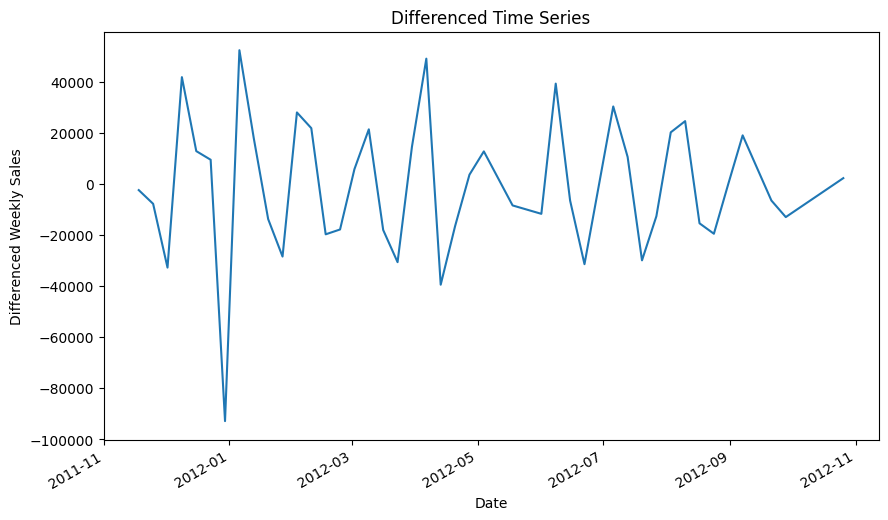

<Figure size 1000x600 with 0 Axes>

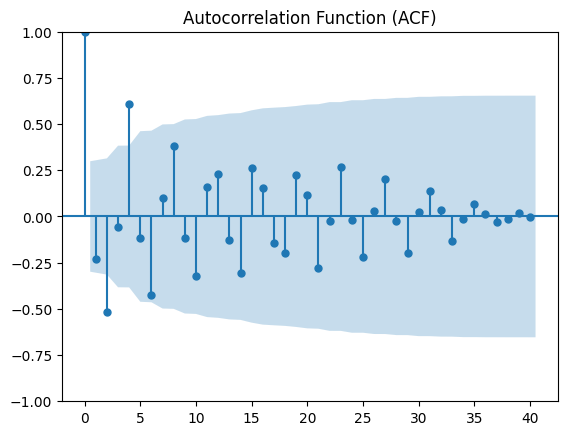

<Figure size 1000x600 with 0 Axes>

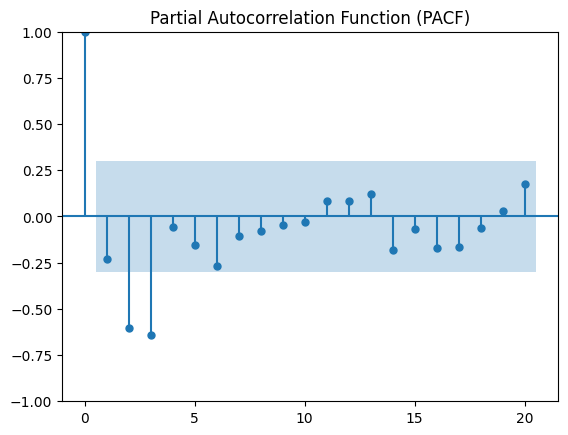

In [68]:
# Plotting the differenced series
plt.figure(figsize=(10, 6))
timeSeries_diff.plot()
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Weekly Sales')
plt.show()

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(timeSeries_diff, lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(timeSeries_diff, lags=20, alpha=0.05, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [69]:
check_stationarity(timeSeries_diff)

ADF Statistic: -12.055138
p-value: 0.000000
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607


<center><h1 style="font-size: 25px;">Taking p = 3 , d = 1 (due to 1 shift) and q = 4 or 6.</h1></center><br>

In [70]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Split the data into train and test sets
split_point = int(len(timeSeries) * 0.75)
train, test = timeSeries[0:split_point], timeSeries[split_point:]

# Step 2: Define ARIMA parameters (example: p=1, d=0, q=1)
p, d, q = 3, 1, 4

# Step 3: Fit the ARIMA model on the training set
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())




C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                   33
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -365.363
Date:                Mon, 17 Jun 2024   AIC                            746.727
Time:                        17:50:53   BIC                            758.453
Sample:                             0   HQIC                           750.614
                                 - 33                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9501      0.371      2.559      0.010       0.222       1.678
ar.L2         -0.9255      0.048    -19.348      0.000      -1.019      -0.832
ar.L3          0.9504      0.355      2.680      0.0

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:
# Step 4: Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Step 5: Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)



Test RMSE: 20209.431


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


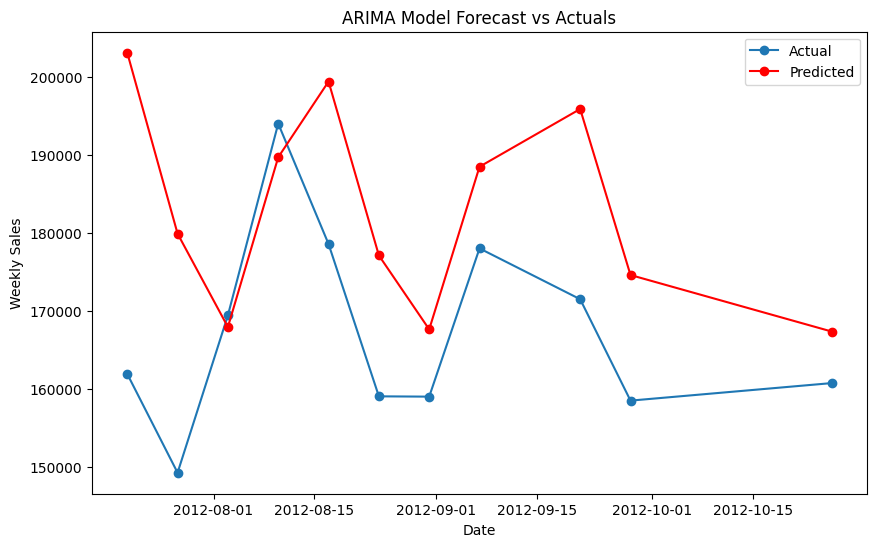

In [72]:
# Optional: Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, marker='o', label='Actual')
plt.plot(test.index, predictions, marker='o', color='red', label='Predicted')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

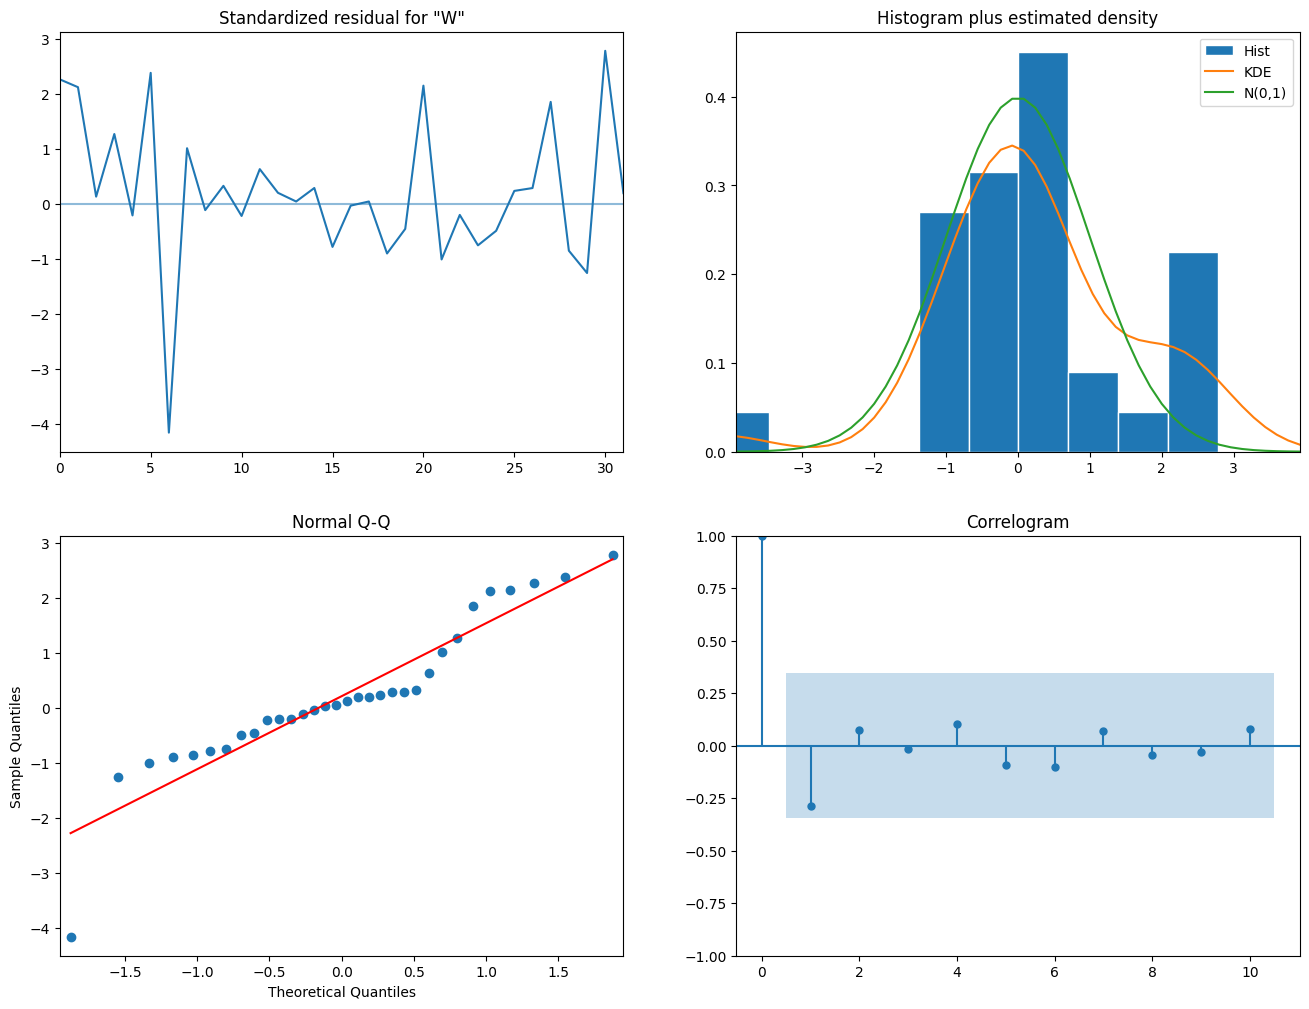

In [73]:
model_fit.plot_diagnostics(figsize=(16,12));

In [75]:
# !pip install pmdarima

In [76]:
import pmdarima as pm
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(1, 1, 4)   Log Likelihood                -366.603
Date:                Mon, 17 Jun 2024   AIC                            747.207
Time:                        17:54:02   BIC                            757.467
Sample:                             0   HQIC                           750.608
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1290.3191   9745.232     -0.132      0.895   -2.04e+04    1.78e+04
ar.L1         -0.6898      0.136     -5.065      0.000      -0.957      -0.423
ma.L1          0.4250      0.506      0.839      0.401      -0.567       1.417
ma.L2         -0.3957      0.136     -2.916      0.004      -0.662      -0.130
ma.L3          0.3415      0.494      0.691      0.489      -0.627       1.310
ma.L4          0.8262      0.300      2.755      0.006       0.238       1.414
sigma2      4.488e+08      0.217   2.06e+09      0.000    4.49e+08    4.49e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.82   Prob(JB):                         0.75
Heteroskedasticity (H):               0.43   Skew:                             0.32
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.91e+24. Standard errors may be unstable.
"""

In [77]:
predictions_auto = auto_arima.predict(steps=len(test))

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


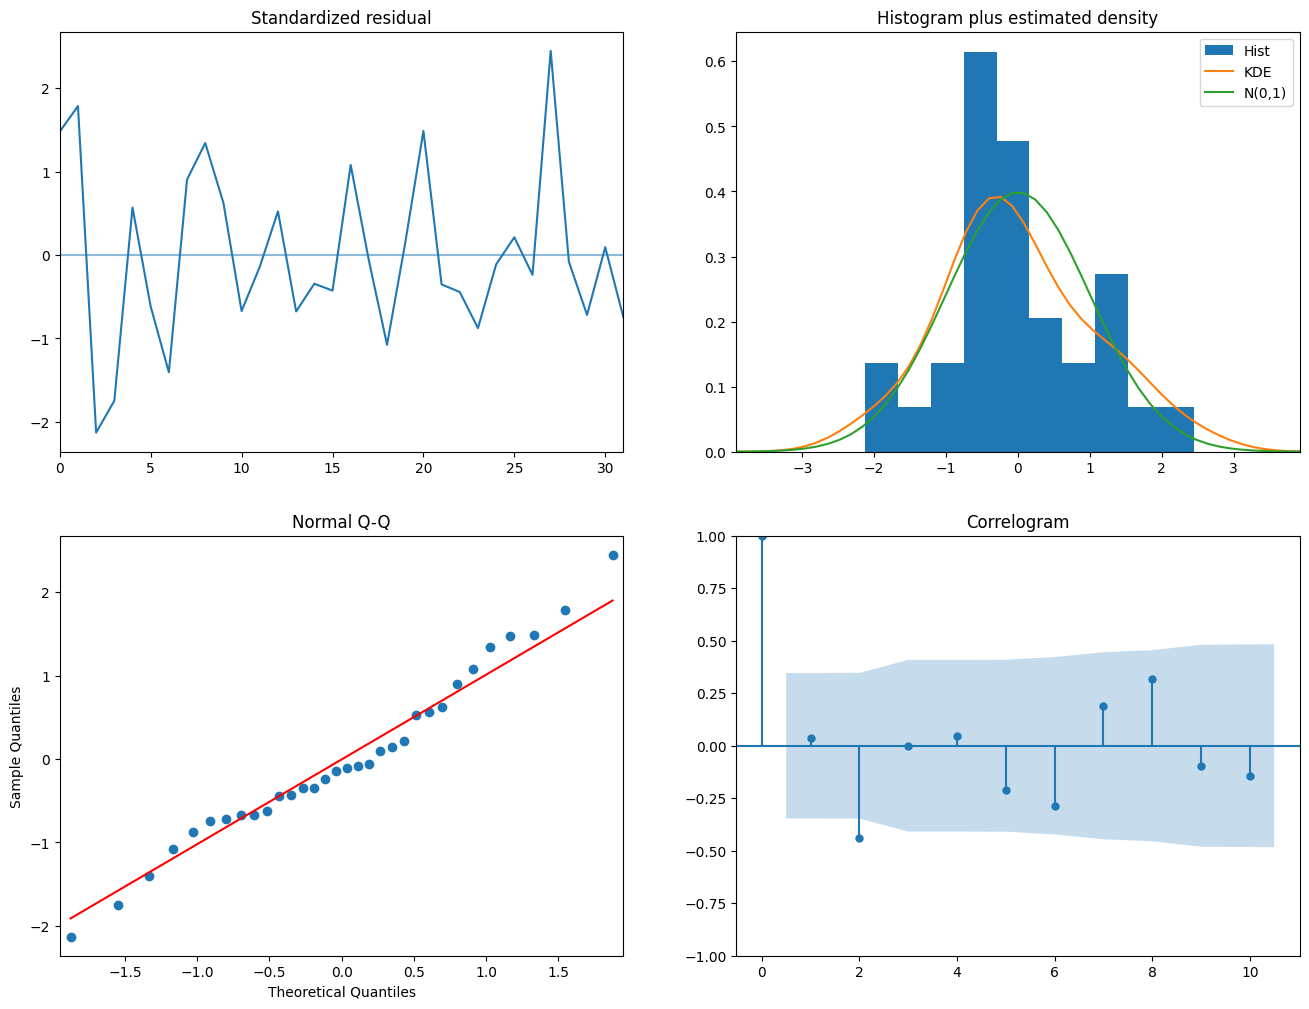

In [78]:
auto_arima.plot_diagnostics(figsize=(16,12));

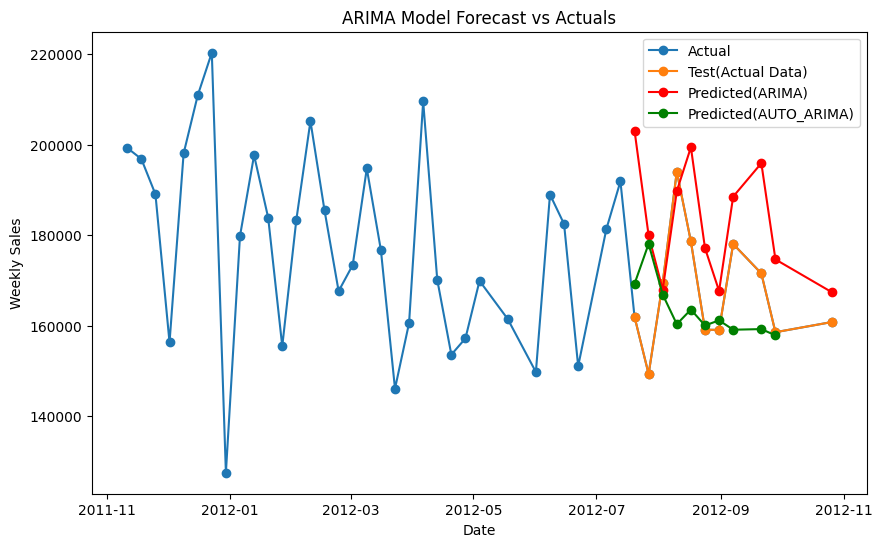

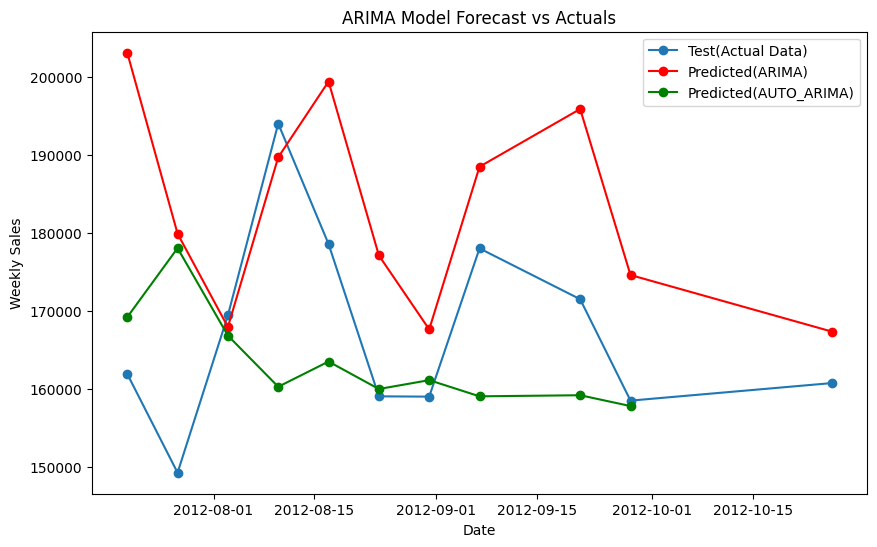

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(timeSeries.index, timeSeries, marker='o', label='Actual')
plt.plot(test.index, test, marker='o', label='Test(Actual Data)')
plt.plot(test.index, predictions, marker='o', color='red', label='Predicted(ARIMA)')
plt.plot(test.index[:-1], predictions_auto, marker='o', color='green', label='Predicted(AUTO_ARIMA)')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test.index, test, marker='o', label='Test(Actual Data)')
plt.plot(test.index, predictions, marker='o', color='red', label='Predicted(ARIMA)')
plt.plot(test.index[:-1], predictions_auto, marker='o', color='green', label='Predicted(AUTO_ARIMA)')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

<center><b><h1 style="font-size: 25px;">Looking at comparison to the test set, the Auto-ARIMA results are way more worse than than ARIMA.</h1></b></center><br>

<center><b><h1 style="font-size: 30px;"><u>Seasonal-ARIMA(SARIMA)</u></h1></b></center><br>

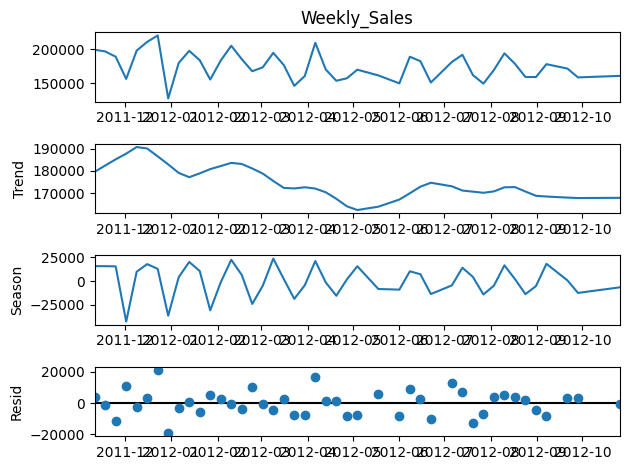

In [82]:
from statsmodels.tsa.seasonal import STL

res = STL(timeSeries,period=4).fit()

res.plot()
plt.show()


<Figure size 1000x600 with 0 Axes>

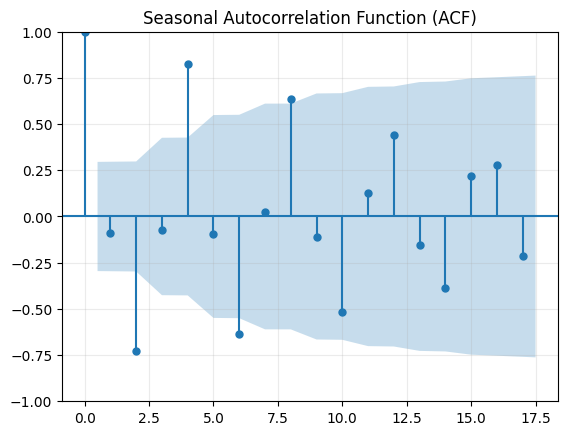

<Figure size 1000x600 with 0 Axes>

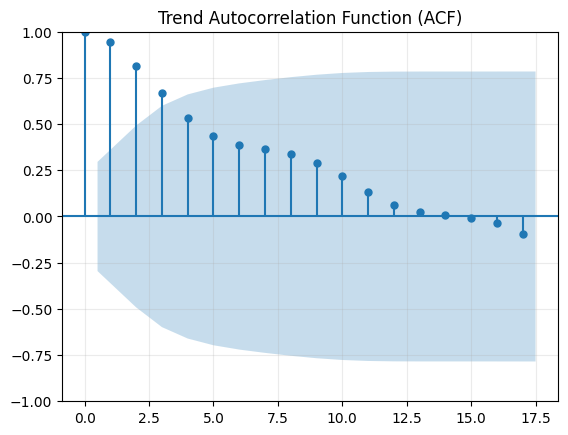

In [83]:
# Plot ACF for Seasonal and non-seasonal parts
plt.figure(figsize=(10, 6))
plot_acf(res.seasonal, alpha=0.05)
plt.title('Seasonal Autocorrelation Function (ACF)')
plt.grid(True,alpha=0.25)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(res.trend, alpha=0.05)
plt.title('Trend Autocorrelation Function (ACF)')
plt.grid(True,alpha=0.25)
plt.show()

<center><b><h1 style="font-size: 25px;">Now, let's define a function to get the best value of p,q and d.</h1></b></center>

In [84]:
import itertools
import statsmodels.api as sm


p = q = range(0, 3)
d = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

pdqs = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=200, freq='W'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {} : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df

In [89]:
# Remember to change frequency to match your time series data
ans_df = sarimax_gridsearch(timeSeries, pdq, pdqs)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 0) x (0, 0, 0, 4) : BIC Calculated =1191.7803216293432
SARIMAX (0, 0, 0) x (0, 0, 1, 4) : BIC Calculated =1168.9878854456838
SARIMAX (0, 0, 0) x (0, 0, 2, 4) : BIC Calculated =1165.2861950312724
SARIMAX (0, 0, 0) x (0, 1, 0, 4) : BIC Calculated =896.1149213129972
SARIMAX (0, 0, 0) x (0, 1, 1, 4) : BIC Calculated =901.33197990627
SARIMAX (0, 0, 0) x (0, 1, 2, 4) : BIC Calculated =908.1096192079182
SARIMAX (0, 0, 0) x (1, 0, 0, 4) : BIC Calculated =1007.7501791943898
SARIMAX (0, 0, 0) x (1, 0, 1, 4) : BIC Calculated =1006.8236059697114


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 0) x (1, 0, 2, 4) : BIC Calculated =1010.5268053246147
SARIMAX (0, 0, 0) x (1, 1, 0, 4) : BIC Calculated =901.8073986288665
SARIMAX (0, 0, 0) x (1, 1, 1, 4) : BIC Calculated =894.7068187898121


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 0) x (1, 1, 2, 4) : BIC Calculated =896.1519874762032
SARIMAX (0, 0, 0) x (2, 0, 0, 4) : BIC Calculated =1004.1315068189971


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 0) x (2, 0, 1, 4) : BIC Calculated =1009.3357454982165


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 0) x (2, 0, 2, 4) : BIC Calculated =1011.382800577022
SARIMAX (0, 0, 0) x (2, 1, 0, 4) : BIC Calculated =905.1457116347046


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 0) x (2, 1, 1, 4) : BIC Calculated =896.2153595141366


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 0) x (2, 1, 2, 4) : BIC Calculated =899.2451312357512
SARIMAX (0, 0, 1) x (0, 0, 0, 4) : BIC Calculated =1166.302645333909
SARIMAX (0, 0, 1) x (0, 0, 1, 4) : BIC Calculated =1163.1458449926417
SARIMAX (0, 0, 1) x (0, 0, 2, 4) : BIC Calculated =1165.1889348993634
SARIMAX (0, 0, 1) x (0, 1, 0, 4) : BIC Calculated =899.7653016977258


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 1) x (0, 1, 1, 4) : BIC Calculated =903.3755708344243
SARIMAX (0, 0, 1) x (0, 1, 2, 4) : BIC Calculated =905.6027683651482
SARIMAX (0, 0, 1) x (1, 0, 0, 4) : BIC Calculated =1159.8016652201443


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 1) x (1, 0, 1, 4) : BIC Calculated =1163.4380642048445
SARIMAX (0, 0, 1) x (1, 0, 2, 4) : BIC Calculated =1167.170420050949


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 1) x (1, 1, 0, 4) : BIC Calculated =903.385957556324


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 1) x (1, 1, 1, 4) : BIC Calculated =897.7416181240177


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 1) x (1, 1, 2, 4) : BIC Calculated =900.4835291862244
SARIMAX (0, 0, 1) x (2, 0, 0, 4) : BIC Calculated =1163.4867620526256


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 1) x (2, 0, 1, 4) : BIC Calculated =1167.147978400382


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 1) x (2, 0, 2, 4) : BIC Calculated =1170.9310383681802
SARIMAX (0, 0, 1) x (2, 1, 0, 4) : BIC Calculated =905.7460043434863


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 1) x (2, 1, 1, 4) : BIC Calculated =900.4784767807706


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 1) x (2, 1, 2, 4) : BIC Calculated =903.464453092708
SARIMAX (0, 0, 2) x (0, 0, 0, 4) : BIC Calculated =1162.212396819518
SARIMAX (0, 0, 2) x (0, 0, 1, 4) : BIC Calculated =1164.378741409252


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 2) x (0, 0, 2, 4) : BIC Calculated =1167.4055428739118
SARIMAX (0, 0, 2) x (0, 1, 0, 4) : BIC Calculated =905.6082102197959
SARIMAX (0, 0, 2) x (0, 1, 1, 4) : BIC Calculated =909.1819393531957


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 2) x (0, 1, 2, 4) : BIC Calculated =910.930338165058
SARIMAX (0, 0, 2) x (1, 0, 0, 4) : BIC Calculated =1162.8024796012467


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 2) x (1, 0, 1, 4) : BIC Calculated =1166.1605701301678


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 2) x (1, 0, 2, 4) : BIC Calculated =1169.9307745454855
SARIMAX (0, 0, 2) x (1, 1, 0, 4) : BIC Calculated =909.2002913208338


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 2) x (1, 1, 1, 4) : BIC Calculated =900.7100921226688


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 2) x (1, 1, 2, 4) : BIC Calculated =902.2975806697316
SARIMAX (0, 0, 2) x (2, 0, 0, 4) : BIC Calculated =1166.3198345281264


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 2) x (2, 0, 1, 4) : BIC Calculated =1170.0236621332638


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 2) x (2, 0, 2, 4) : BIC Calculated =1173.8077038920226
SARIMAX (0, 0, 2) x (2, 1, 0, 4) : BIC Calculated =911.112515942097


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 0, 2) x (2, 1, 1, 4) : BIC Calculated =902.3009784632742


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 0, 2) x (2, 1, 2, 4) : BIC Calculated =905.2722934140846
SARIMAX (0, 1, 0) x (0, 0, 0, 4) : BIC Calculated =1003.1325091236608
SARIMAX (0, 1, 0) x (0, 0, 1, 4) : BIC Calculated =996.2141332126151
SARIMAX (0, 1, 0) x (0, 0, 2, 4) : BIC Calculated =990.7804665001049
SARIMAX (0, 1, 0) x (0, 1, 0, 4) : BIC Calculated =898.8509587493071
SARIMAX (0, 1, 0) x (0, 1, 1, 4) : BIC Calculated =901.0681313882055


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 0) x (0, 1, 2, 4) : BIC Calculated =905.4804908801259
SARIMAX (0, 1, 0) x (1, 0, 0, 4) : BIC Calculated =989.4841211757811
SARIMAX (0, 1, 0) x (1, 0, 1, 4) : BIC Calculated =992.7218778863569


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 0) x (1, 0, 2, 4) : BIC Calculated =993.8105535816463
SARIMAX (0, 1, 0) x (1, 1, 0, 4) : BIC Calculated =901.1241015357656


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 0) x (1, 1, 1, 4) : BIC Calculated =899.8550780254589


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 0) x (1, 1, 2, 4) : BIC Calculated =904.5204038968101
SARIMAX (0, 1, 0) x (2, 0, 0, 4) : BIC Calculated =992.313412343789
SARIMAX (0, 1, 0) x (2, 0, 1, 4) : BIC Calculated =994.9522707508361


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 0) x (2, 0, 2, 4) : BIC Calculated =997.5833280108357
SARIMAX (0, 1, 0) x (2, 1, 0, 4) : BIC Calculated =906.4506972764771


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 0) x (2, 1, 1, 4) : BIC Calculated =904.3230453711609


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 0) x (2, 1, 2, 4) : BIC Calculated =905.5159796326868
SARIMAX (0, 1, 1) x (0, 0, 0, 4) : BIC Calculated =1003.7775316323313
SARIMAX (0, 1, 1) x (0, 0, 1, 4) : BIC Calculated =995.9355898773954


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 1) x (0, 0, 2, 4) : BIC Calculated =990.4655144356767
SARIMAX (0, 1, 1) x (0, 1, 0, 4) : BIC Calculated =897.1588152485576
SARIMAX (0, 1, 1) x (0, 1, 1, 4) : BIC Calculated =899.1807556858571
SARIMAX (0, 1, 1) x (0, 1, 2, 4) : BIC Calculated =902.5121719599939


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 1) x (1, 0, 0, 4) : BIC Calculated =989.3904408401611
SARIMAX (0, 1, 1) x (1, 0, 1, 4) : BIC Calculated =988.4334456475078


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 1) x (1, 0, 2, 4) : BIC Calculated =991.2971093343674
SARIMAX (0, 1, 1) x (1, 1, 0, 4) : BIC Calculated =899.3021828337476


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 1) x (1, 1, 1, 4) : BIC Calculated =898.1317447987892


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 1) x (1, 1, 2, 4) : BIC Calculated =902.6944690418424
SARIMAX (0, 1, 1) x (2, 0, 0, 4) : BIC Calculated =987.5165656271164


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 1) x (2, 0, 1, 4) : BIC Calculated =991.2378309052307


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 1) x (2, 0, 2, 4) : BIC Calculated =994.9724404090632
SARIMAX (0, 1, 1) x (2, 1, 0, 4) : BIC Calculated =902.8699227122112


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 1) x (2, 1, 1, 4) : BIC Calculated =902.4743671073329


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 1) x (2, 1, 2, 4) : BIC Calculated =903.1382708067292
SARIMAX (0, 1, 2) x (0, 0, 0, 4) : BIC Calculated =1002.2870026570907
SARIMAX (0, 1, 2) x (0, 0, 1, 4) : BIC Calculated =995.1627866629254


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 2) x (0, 0, 2, 4) : BIC Calculated =990.7720365393666
SARIMAX (0, 1, 2) x (0, 1, 0, 4) : BIC Calculated =927.3883697660915


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 2) x (0, 1, 1, 4) : BIC Calculated =930.0716430046215


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 2) x (0, 1, 2, 4) : BIC Calculated =932.2308166397052
SARIMAX (0, 1, 2) x (1, 0, 0, 4) : BIC Calculated =990.1352114299632
SARIMAX (0, 1, 2) x (1, 0, 1, 4) : BIC Calculated =989.815051859045


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 2) x (1, 0, 2, 4) : BIC Calculated =992.4337136524383


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 2) x (1, 1, 0, 4) : BIC Calculated =929.7133142253987


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 2) x (1, 1, 1, 4) : BIC Calculated =932.6020891357725


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 2) x (1, 1, 2, 4) : BIC Calculated =936.9184474106975
SARIMAX (0, 1, 2) x (2, 0, 0, 4) : BIC Calculated =988.7423797830306


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (0, 1, 2) x (2, 0, 1, 4) : BIC Calculated =992.4918875695545


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 2) x (2, 0, 2, 4) : BIC Calculated =996.1574838158783


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 2) x (2, 1, 0, 4) : BIC Calculated =932.0535221470699


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 2) x (2, 1, 1, 4) : BIC Calculated =936.3638300700203


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (0, 1, 2) x (2, 1, 2, 4) : BIC Calculated =941.4601229916087
SARIMAX (1, 0, 0) x (0, 0, 0, 4) : BIC Calculated =1033.729072451813
SARIMAX (1, 0, 0) x (0, 0, 1, 4) : BIC Calculated =1023.5720747803183


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 0, 0) x (0, 0, 2, 4) : BIC Calculated =1025.2106199147647
SARIMAX (1, 0, 0) x (0, 1, 0, 4) : BIC Calculated =899.5806882265108
SARIMAX (1, 0, 0) x (0, 1, 1, 4) : BIC Calculated =903.1961375803235


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 0, 0) x (0, 1, 2, 4) : BIC Calculated =905.5886812495748
SARIMAX (1, 0, 0) x (1, 0, 0, 4) : BIC Calculated =1020.9967142284426


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 0, 0) x (1, 0, 1, 4) : BIC Calculated =1023.3195666816094


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 0) x (1, 0, 2, 4) : BIC Calculated =1027.1024563509275
SARIMAX (1, 0, 0) x (1, 1, 0, 4) : BIC Calculated =903.2062246308706


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 0, 0) x (1, 1, 1, 4) : BIC Calculated =898.7418203993413


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 0) x (1, 1, 2, 4) : BIC Calculated =901.5739010814937
SARIMAX (1, 0, 0) x (2, 0, 0, 4) : BIC Calculated =1023.414004022364


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 0, 0) x (2, 0, 1, 4) : BIC Calculated =1027.1010258150445


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 0) x (2, 0, 2, 4) : BIC Calculated =1030.7743245819186
SARIMAX (1, 0, 0) x (2, 1, 0, 4) : BIC Calculated =905.715106042085


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 0, 0) x (2, 1, 1, 4) : BIC Calculated =901.570125664121


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 0) x (2, 1, 2, 4) : BIC Calculated =904.6148086905132
SARIMAX (1, 0, 1) x (0, 0, 0, 4) : BIC Calculated =1014.5254673745245


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 0, 1) x (0, 0, 1, 4) : BIC Calculated =1015.5802714106754
SARIMAX (1, 0, 1) x (0, 0, 2, 4) : BIC Calculated =1015.9140519033301


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 0, 1) x (0, 1, 0, 4) : BIC Calculated =901.1531191094302


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 1) x (0, 1, 1, 4) : BIC Calculated =904.8398513801119
SARIMAX (1, 0, 1) x (0, 1, 2, 4) : BIC Calculated =909.2928756485214


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 0, 1) x (1, 0, 0, 4) : BIC Calculated =1006.1855834791459


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 1) x (1, 0, 1, 4) : BIC Calculated =1006.3950752062823


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 1) x (1, 0, 2, 4) : BIC Calculated =1018.9784441328349


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 1) x (1, 1, 0, 4) : BIC Calculated =904.8398516291076


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 1) x (1, 1, 1, 4) : BIC Calculated =901.4224824938777


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 1) x (1, 1, 2, 4) : BIC Calculated =904.1283786276385


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 1) x (2, 0, 0, 4) : BIC Calculated =1015.1217018726995


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\a

SARIMAX (1, 0, 1) x (2, 0, 1, 4) : BIC Calculated =22.705137803509565
SARIMAX (1, 0, 1) x (2, 0, 2, 4) : BIC Calculated =1022.8413703692662
SARIMAX (1, 0, 1) x (2, 1, 0, 4) : BIC Calculated =909.4364407462522


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 0, 1) x (2, 1, 1, 4) : BIC Calculated =904.1237431653392


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 1) x (2, 1, 2, 4) : BIC Calculated =907.0986251226935
SARIMAX (1, 0, 2) x (0, 0, 0, 4) : BIC Calculated =1018.2014080050786


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 0, 2) x (0, 0, 1, 4) : BIC Calculated =1012.579644420139


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (0, 0, 2, 4) : BIC Calculated =1011.6084890012455
SARIMAX (1, 0, 2) x (0, 1, 0, 4) : BIC Calculated =909.556096956806


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 0, 2) x (0, 1, 1, 4) : BIC Calculated =912.0013871671039


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (0, 1, 2, 4) : BIC Calculated =912.2570122267737


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (1, 0, 0, 4) : BIC Calculated =1007.9031902309079


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (1, 0, 1, 4) : BIC Calculated =1010.8140858560278


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (1, 0, 2, 4) : BIC Calculated =1014.4812447553


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (1, 1, 0, 4) : BIC Calculated =912.4590090508309


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (1, 1, 1, 4) : BIC Calculated =901.96528860078


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (1, 1, 2, 4) : BIC Calculated =904.111737801738


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (2, 0, 0, 4) : BIC Calculated =1010.601744901246


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (2, 0, 1, 4) : BIC Calculated =1014.188330774285


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (2, 0, 2, 4) : BIC Calculated =1018.4489086146746


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (2, 1, 0, 4) : BIC Calculated =913.04599668324


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (2, 1, 1, 4) : BIC Calculated =904.3351075176554


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 0, 2) x (2, 1, 2, 4) : BIC Calculated =907.7787420836106
SARIMAX (1, 1, 0) x (0, 0, 0, 4) : BIC Calculated =1005.721499555506
SARIMAX (1, 1, 0) x (0, 0, 1, 4) : BIC Calculated =998.9251782969089
SARIMAX (1, 1, 0) x (0, 0, 2, 4) : BIC Calculated =996.5912527032602
SARIMAX (1, 1, 0) x (0, 1, 0, 4) : BIC Calculated =897.1795926137318


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 0) x (0, 1, 1, 4) : BIC Calculated =899.4389532894365
SARIMAX (1, 1, 0) x (0, 1, 2, 4) : BIC Calculated =902.7854604928948
SARIMAX (1, 1, 0) x (1, 0, 0, 4) : BIC Calculated =994.4331044186406


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 0) x (1, 0, 1, 4) : BIC Calculated =995.0617340255086
SARIMAX (1, 1, 0) x (1, 0, 2, 4) : BIC Calculated =998.2612214333174
SARIMAX (1, 1, 0) x (1, 1, 0, 4) : BIC Calculated =899.5491525472071


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 0) x (1, 1, 1, 4) : BIC Calculated =899.3710272940472


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 0) x (1, 1, 2, 4) : BIC Calculated =903.6136323864741
SARIMAX (1, 1, 0) x (2, 0, 0, 4) : BIC Calculated =994.5175820364809


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 0) x (2, 0, 1, 4) : BIC Calculated =998.2454669741002
SARIMAX (1, 1, 0) x (2, 0, 2, 4) : BIC Calculated =1001.9879099577929
SARIMAX (1, 1, 0) x (2, 1, 0, 4) : BIC Calculated =903.1218755724982


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 0) x (2, 1, 1, 4) : BIC Calculated =903.4414258318019


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 0) x (2, 1, 2, 4) : BIC Calculated =904.7206604640564
SARIMAX (1, 1, 1) x (0, 0, 0, 4) : BIC Calculated =1003.0767246212268


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 1) x (0, 0, 1, 4) : BIC Calculated =997.2094274866866
SARIMAX (1, 1, 1) x (0, 0, 2, 4) : BIC Calculated =989.7044568099665


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 1) x (0, 1, 0, 4) : BIC Calculated =900.8558638362579
SARIMAX (1, 1, 1) x (0, 1, 1, 4) : BIC Calculated =902.8764160068449


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 1) x (0, 1, 2, 4) : BIC Calculated =906.1939274333848
SARIMAX (1, 1, 1) x (1, 0, 0, 4) : BIC Calculated =989.4147370237696


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 1) x (1, 0, 1, 4) : BIC Calculated =987.797045716263


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 1) x (1, 0, 2, 4) : BIC Calculated =990.1072896296182
SARIMAX (1, 1, 1) x (1, 1, 0, 4) : BIC Calculated =902.9998432592372


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 1) x (1, 1, 1, 4) : BIC Calculated =901.7184659916235


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 1) x (1, 1, 2, 4) : BIC Calculated =906.2929105218819
SARIMAX (1, 1, 1) x (2, 0, 0, 4) : BIC Calculated =986.4706352466743


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 1) x (2, 0, 1, 4) : BIC Calculated =990.2218118259052


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 1) x (2, 0, 2, 4) : BIC Calculated =993.8352017957548
SARIMAX (1, 1, 1) x (2, 1, 0, 4) : BIC Calculated =906.563252067738


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 1) x (2, 1, 1, 4) : BIC Calculated =906.0595282342991


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 1) x (2, 1, 2, 4) : BIC Calculated =906.6234075287606
SARIMAX (1, 1, 2) x (0, 0, 0, 4) : BIC Calculated =1006.1306185407104
SARIMAX (1, 1, 2) x (0, 0, 1, 4) : BIC Calculated =998.9002787723983


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 2) x (0, 0, 2, 4) : BIC Calculated =994.3372355110475
SARIMAX (1, 1, 2) x (0, 1, 0, 4) : BIC Calculated =908.8843599787906


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 2) x (0, 1, 1, 4) : BIC Calculated =911.2676456319778


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 2) x (0, 1, 2, 4) : BIC Calculated =914.6810690156711
SARIMAX (1, 1, 2) x (1, 0, 0, 4) : BIC Calculated =993.5401241229137


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 2) x (1, 0, 1, 4) : BIC Calculated =993.366376622739


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 2) x (1, 0, 2, 4) : BIC Calculated =995.3864549762014
SARIMAX (1, 1, 2) x (1, 1, 0, 4) : BIC Calculated =911.340045883829


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 2) x (1, 1, 1, 4) : BIC Calculated =905.1542181827765


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 2) x (1, 1, 2, 4) : BIC Calculated =908.0703263791289
SARIMAX (1, 1, 2) x (2, 0, 0, 4) : BIC Calculated =992.2674876805725


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (1, 1, 2) x (2, 0, 1, 4) : BIC Calculated =996.0153788158119


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 2) x (2, 0, 2, 4) : BIC Calculated =999.1026621908059


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 2) x (2, 1, 0, 4) : BIC Calculated =914.9527173418568


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 2) x (2, 1, 1, 4) : BIC Calculated =907.889502120622


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (1, 1, 2) x (2, 1, 2, 4) : BIC Calculated =907.558688210434
SARIMAX (2, 0, 0) x (0, 0, 0, 4) : BIC Calculated =1035.3153816596055
SARIMAX (2, 0, 0) x (0, 0, 1, 4) : BIC Calculated =1027.051670371764


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 0, 0) x (0, 0, 2, 4) : BIC Calculated =1026.005500402107
SARIMAX (2, 0, 0) x (0, 1, 0, 4) : BIC Calculated =903.263878341704
SARIMAX (2, 0, 0) x (0, 1, 1, 4) : BIC Calculated =906.8362002557044


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 0, 0) x (0, 1, 2, 4) : BIC Calculated =909.1994167775935
SARIMAX (2, 0, 0) x (1, 0, 0, 4) : BIC Calculated =1021.5671449877696


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 0, 0) x (1, 0, 1, 4) : BIC Calculated =1024.2015570225278


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 0) x (1, 0, 2, 4) : BIC Calculated =1027.9836825433672
SARIMAX (2, 0, 0) x (1, 1, 0, 4) : BIC Calculated =906.8572131983927


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 0, 0) x (1, 1, 1, 4) : BIC Calculated =902.366999698104


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 0) x (1, 1, 2, 4) : BIC Calculated =905.0732736329


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 0) x (2, 0, 0, 4) : BIC Calculated =1024.2450623454952


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 0) x (2, 0, 1, 4) : BIC Calculated =1027.9817126498617


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 0) x (2, 0, 2, 4) : BIC Calculated =1031.6578974313131
SARIMAX (2, 0, 0) x (2, 1, 0, 4) : BIC Calculated =909.3192076393672


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 0, 0) x (2, 1, 1, 4) : BIC Calculated =905.0700712853268


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 0) x (2, 1, 2, 4) : BIC Calculated =908.1688617889434


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (0, 0, 0, 4) : BIC Calculated =1041.2922096091074


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (0, 0, 1, 4) : BIC Calculated =1011.9254728233557


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (0, 0, 2, 4) : BIC Calculated =1010.105359864903
SARIMAX (2, 0, 1) x (0, 1, 0, 4) : BIC Calculated =907.0626502181017


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 0, 1) x (0, 1, 1, 4) : BIC Calculated =910.0325896540012


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (0, 1, 2, 4) : BIC Calculated =910.9726233736694


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (1, 0, 0, 4) : BIC Calculated =1006.5055771696772


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (1, 0, 1, 4) : BIC Calculated =1009.2760398917135


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (1, 0, 2, 4) : BIC Calculated =1012.924621355672
SARIMAX (2, 0, 1) x (1, 1, 0, 4) : BIC Calculated =910.2749267276216


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 0, 1) x (1, 1, 1, 4) : BIC Calculated =903.9517414373041


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (1, 1, 2, 4) : BIC Calculated =906.6003272142312


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (2, 0, 0, 4) : BIC Calculated =1009.0202452044699


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (2, 0, 1, 4) : BIC Calculated =1012.5379074265128


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (2, 0, 2, 4) : BIC Calculated =1016.8415395374976


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (2, 1, 0, 4) : BIC Calculated =911.6443378617699


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (2, 1, 1, 4) : BIC Calculated =906.7283732227888


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 1) x (2, 1, 2, 4) : BIC Calculated =908.5922012596071


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (0, 0, 0, 4) : BIC Calculated =1020.7019629559508


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (0, 0, 1, 4) : BIC Calculated =1015.178857165084


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (0, 0, 2, 4) : BIC Calculated =1013.9691672592539


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (0, 1, 0, 4) : BIC Calculated =907.872309563709


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (0, 1, 1, 4) : BIC Calculated =911.3636635487137


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (0, 1, 2, 4) : BIC Calculated =914.2316289591836


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (1, 0, 0, 4) : BIC Calculated =1002.1333686167637


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (1, 0, 1, 4) : BIC Calculated =1013.3999141848328


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (1, 0, 2, 4) : BIC Calculated =1017.0822645659267


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (1, 1, 0, 4) : BIC Calculated =911.382310527067


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (1, 1, 1, 4) : BIC Calculated =905.6562942328599


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (1, 1, 2, 4) : BIC Calculated =908.8805820092263


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (2, 0, 0, 4) : BIC Calculated =1006.1984582189875


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (2, 0, 1, 4) : BIC Calculated =1016.5953230373541


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (2, 0, 2, 4) : BIC Calculated =1020.9641781598466


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (2, 1, 0, 4) : BIC Calculated =914.5606662995176


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (2, 1, 1, 4) : BIC Calculated =908.8407284040543


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 0, 2) x (2, 1, 2, 4) : BIC Calculated =911.1639077932417
SARIMAX (2, 1, 0) x (0, 0, 0, 4) : BIC Calculated =1002.7473466562867
SARIMAX (2, 1, 0) x (0, 0, 1, 4) : BIC Calculated =995.6543141010427


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 0) x (0, 0, 2, 4) : BIC Calculated =990.9494658382797
SARIMAX (2, 1, 0) x (0, 1, 0, 4) : BIC Calculated =898.7183995146611
SARIMAX (2, 1, 0) x (0, 1, 1, 4) : BIC Calculated =900.9237562017155
SARIMAX (2, 1, 0) x (0, 1, 2, 4) : BIC Calculated =904.3267999892728


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 0) x (1, 0, 0, 4) : BIC Calculated =990.2299438986663
SARIMAX (2, 1, 0) x (1, 0, 1, 4) : BIC Calculated =989.8497408281014


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 0) x (1, 0, 2, 4) : BIC Calculated =992.5714939430678
SARIMAX (2, 1, 0) x (1, 1, 0, 4) : BIC Calculated =901.0230177846936


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 0) x (1, 1, 1, 4) : BIC Calculated =900.5926167459937


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 0) x (1, 1, 2, 4) : BIC Calculated =904.9635302395973
SARIMAX (2, 1, 0) x (2, 0, 0, 4) : BIC Calculated =988.8158234371186


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 0) x (2, 0, 1, 4) : BIC Calculated =992.5723513174314


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 0) x (2, 0, 2, 4) : BIC Calculated =996.2677206885588
SARIMAX (2, 1, 0) x (2, 1, 0, 4) : BIC Calculated =904.613294760252


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 0) x (2, 1, 1, 4) : BIC Calculated =904.7933708681824


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 0) x (2, 1, 2, 4) : BIC Calculated =905.7332997833372
SARIMAX (2, 1, 1) x (0, 0, 0, 4) : BIC Calculated =1021.4381353820986
SARIMAX (2, 1, 1) x (0, 0, 1, 4) : BIC Calculated =1010.5243181398878


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 1) x (0, 0, 2, 4) : BIC Calculated =997.9032592108457
SARIMAX (2, 1, 1) x (0, 1, 0, 4) : BIC Calculated =898.9449122710397
SARIMAX (2, 1, 1) x (0, 1, 1, 4) : BIC Calculated =902.4149163785522


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 1) x (0, 1, 2, 4) : BIC Calculated =905.6500725218912


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 1) x (1, 0, 0, 4) : BIC Calculated =999.2801301372114


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 1) x (1, 0, 1, 4) : BIC Calculated =996.6413942348411


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 1) x (1, 0, 2, 4) : BIC Calculated =997.7810011122571
SARIMAX (2, 1, 1) x (1, 1, 0, 4) : BIC Calculated =902.4357876794775


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 1) x (1, 1, 1, 4) : BIC Calculated =901.2212007479733


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 1) x (1, 1, 2, 4) : BIC Calculated =905.9434565650491
SARIMAX (2, 1, 1) x (2, 0, 0, 4) : BIC Calculated =994.2097947700624


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 1) x (2, 0, 1, 4) : BIC Calculated =997.944989405187


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 1) x (2, 0, 2, 4) : BIC Calculated =1001.4644866576513
SARIMAX (2, 1, 1) x (2, 1, 0, 4) : BIC Calculated =905.9338311435409


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 1) x (2, 1, 1, 4) : BIC Calculated =905.9124854368038


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 1) x (2, 1, 2, 4) : BIC Calculated =905.4568098058608
SARIMAX (2, 1, 2) x (0, 0, 0, 4) : BIC Calculated =1006.8465645762701


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 2) x (0, 0, 1, 4) : BIC Calculated =996.1203807560934


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 2) x (0, 0, 2, 4) : BIC Calculated =991.3880718081451
SARIMAX (2, 1, 2) x (0, 1, 0, 4) : BIC Calculated =899.729379582447


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 2) x (0, 1, 1, 4) : BIC Calculated =903.1958887459328


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 2) x (0, 1, 2, 4) : BIC Calculated =905.975647985048


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 2) x (1, 0, 0, 4) : BIC Calculated =998.5167610384584


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 2) x (1, 0, 1, 4) : BIC Calculated =992.0255996992901


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 2) x (1, 0, 2, 4) : BIC Calculated =992.6711234780481
SARIMAX (2, 1, 2) x (1, 1, 0, 4) : BIC Calculated =903.2246535144463


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX (2, 1, 2) x (1, 1, 1, 4) : BIC Calculated =893.640880181353


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 2) x (1, 1, 2, 4) : BIC Calculated =897.307159957183


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 2) x (2, 0, 0, 4) : BIC Calculated =989.7671399762097


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 2) x (2, 0, 1, 4) : BIC Calculated =993.301827124356


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 2) x (2, 0, 2, 4) : BIC Calculated =996.4179393970625


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 2) x (2, 1, 0, 4) : BIC Calculated =906.1211375980464


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 2) x (2, 1, 1, 4) : BIC Calculated =897.3097970008815


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX (2, 1, 2) x (2, 1, 2, 4) : BIC Calculated =902.5127966625319


In [107]:
ans_df

pdq          pdqs         bic
139  (1, 0, 1)  (2, 0, 1, 4)   22.705138
316  (2, 1, 2)  (1, 1, 1, 4)  893.640880
10   (0, 0, 0)  (1, 1, 1, 4)  894.706819
3    (0, 0, 0)  (0, 1, 0, 4)  896.114921
11   (0, 0, 0)  (1, 1, 2, 4)  896.151987

<center><b><h1 style="font-size: 20px;">Here we can clearly see that (2,1,2) is the best value of p,q,d.(We cannot take (1,0,1) as d cannot be 0 because we have done a differencing of 1.)</h1></b></center><br>

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                        Weekly_Sales   No. Observations:                   33
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 4)   Log Likelihood                -233.506
Date:                             Mon, 17 Jun 2024   AIC                            481.012
Time:                                     18:23:22   BIC                            488.324
Sample:                                          0   HQIC                           482.599
                                              - 33                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6590      0.882      0.747      0.455      -1.070       2.388
ar.L2         -0.0571      

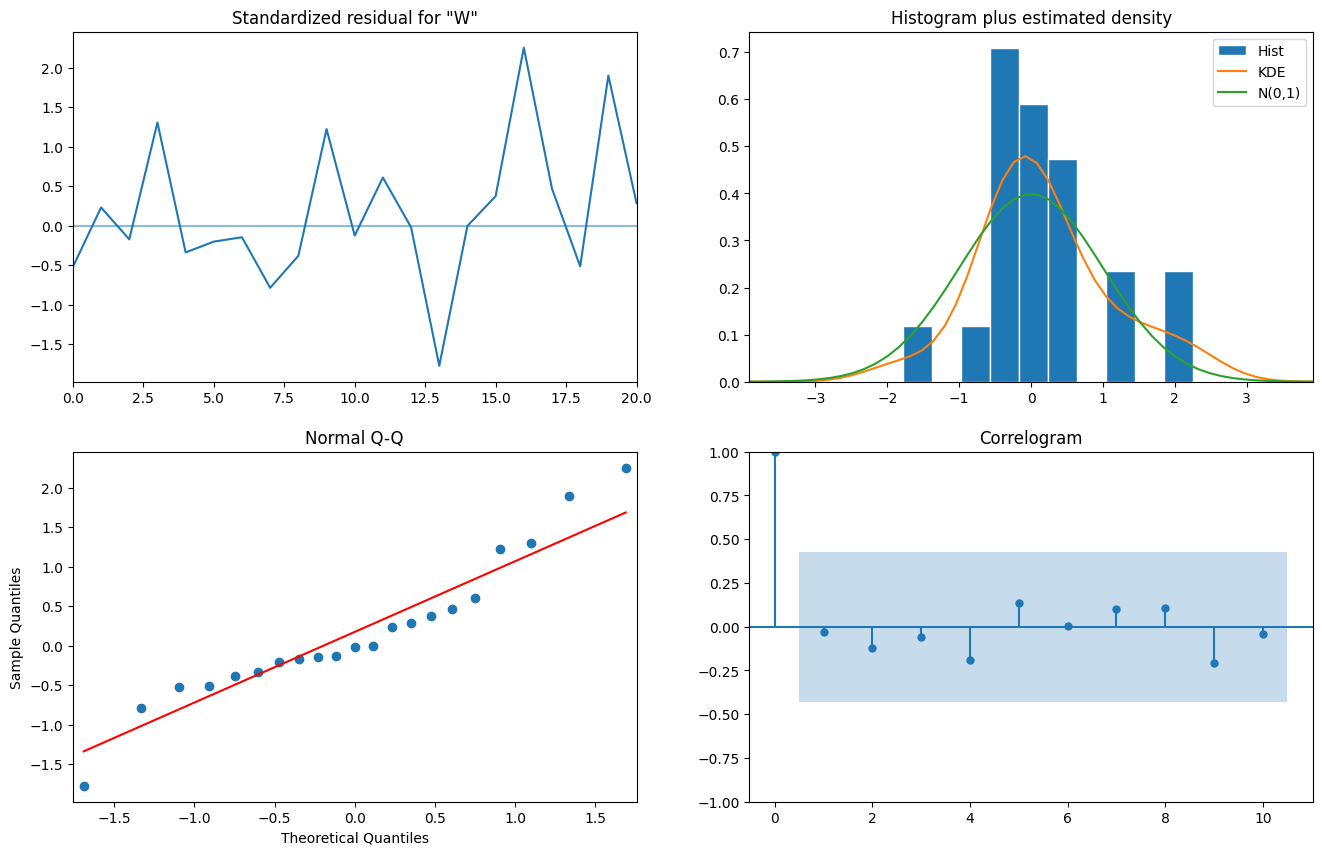

In [92]:
# Build SARIMAX model w/optimal parameters
sarimax = sm.tsa.statespace.SARIMAX(train, 
                                    order=(2,1,2), 
                                    seasonal_order=(1,1,1,4), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False)
                                    
# Fit the model
output = sarimax.fit()
    
# Print output summary
print(output.summary())

# Plot diagnostics
output.plot_diagnostics(figsize=(16,10));

In [93]:
predictions_sarima = output.predict(start=33,end=43)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


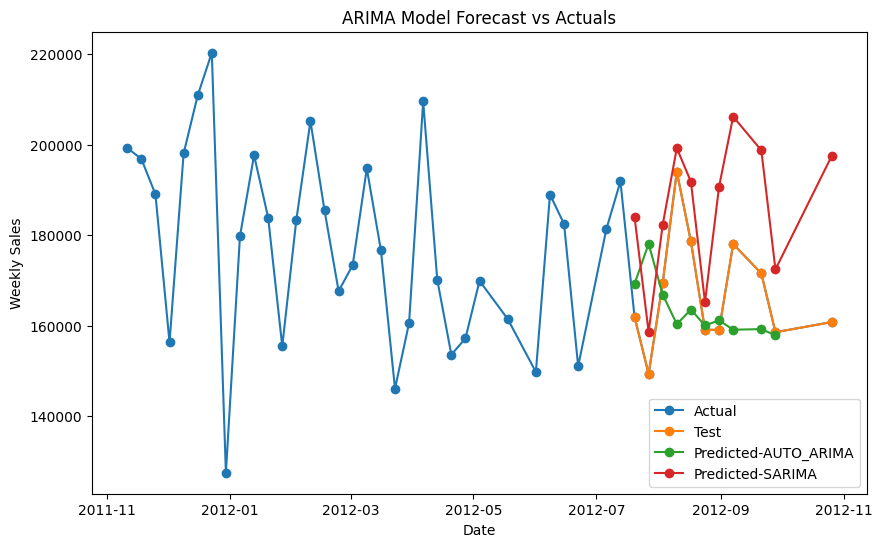

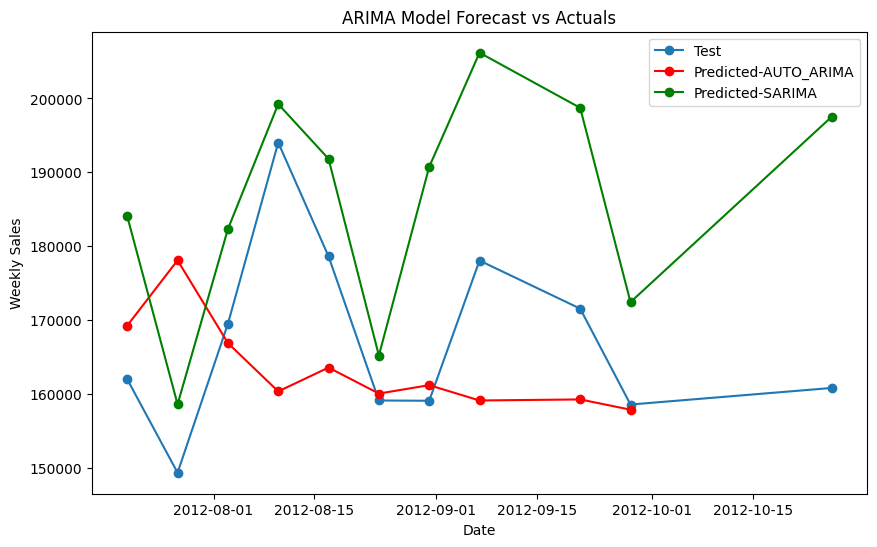

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(timeSeries.index, timeSeries, marker='o', label='Actual')
plt.plot(test.index, test, marker='o', label='Test')
plt.plot(test.index[:-1], predictions_auto, marker='o', label='Predicted-AUTO_ARIMA')
plt.plot(test.index, predictions_sarima, marker='o', label='Predicted-SARIMA')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test.index, test, marker='o', label='Test')
plt.plot(test.index[:-1], predictions_auto, marker='o', color='red', label='Predicted-AUTO_ARIMA')
plt.plot(test.index, predictions_sarima, marker='o',color='green',label='Predicted-SARIMA')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

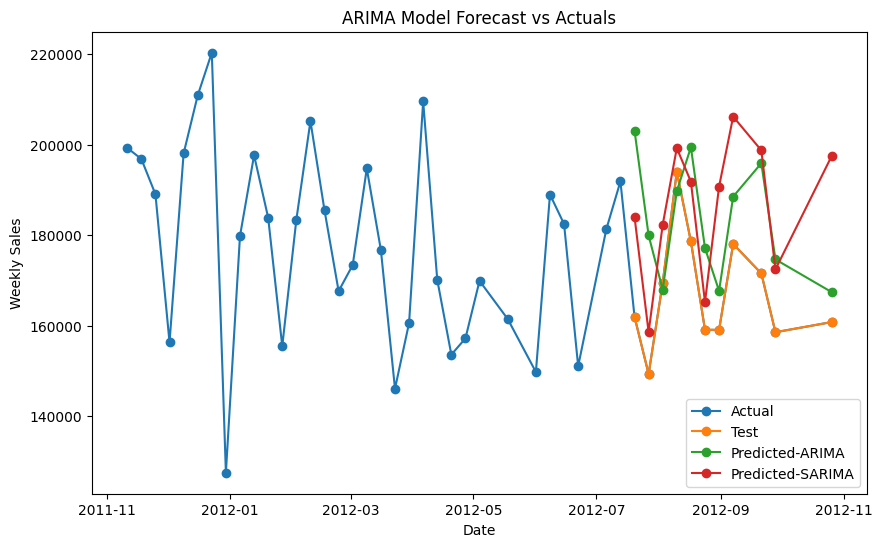

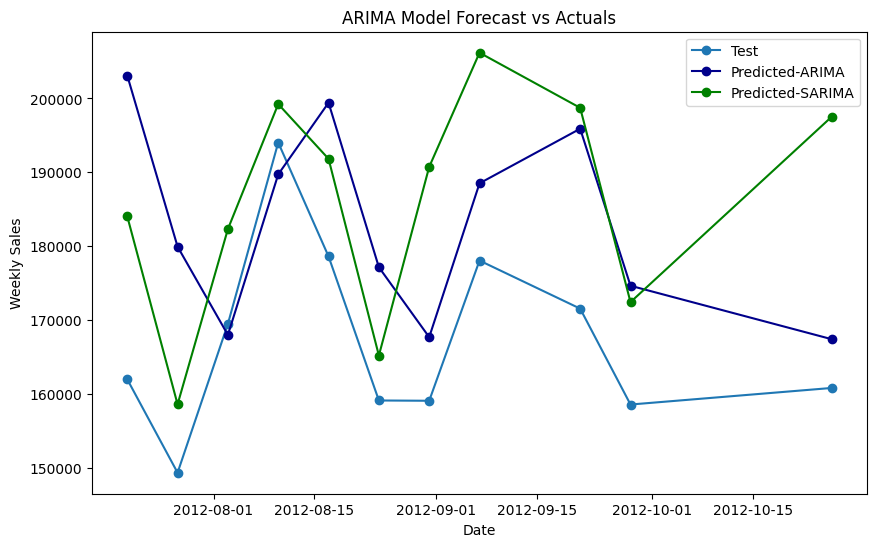

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(timeSeries.index, timeSeries, marker='o', label='Actual')
plt.plot(test.index, test, marker='o', label='Test')
plt.plot(test.index, predictions, marker='o', label='Predicted-ARIMA')
plt.plot(test.index, predictions_sarima, marker='o', label='Predicted-SARIMA')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test.index, test, marker='o', label='Test')
plt.plot(test.index, predictions, marker='o', color='darkblue', label='Predicted-ARIMA')
plt.plot(test.index, predictions_sarima, marker='o',color='green',label='Predicted-SARIMA')
plt.legend()
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

<center>
  <h1 style="font-size: 25px;">
    Interesting that the "Seasonal-ARIMA" results looks a lot more similar to the "Hand-tuned ARIMA" and not like the "Automated ARIMA".
  </h1>
</center>
<br>


In [103]:
# Step 5: Evaluate the model
mse = mean_squared_error(test, predictions)
rmse_ar = np.sqrt(mse)
rmse_ar

20209.4310314473

In [104]:
# Step 5: Evaluate the model
mse = mean_squared_error(test[:-1], predictions_auto)
rmse_auto= np.sqrt(mse)
rmse_auto

16636.83305627901

In [105]:
# Step 5: Evaluate the model
mse = mean_squared_error(test, predictions_sarima)
rmse_sarima = np.sqrt(mse)
rmse_sarima

21441.846229750707

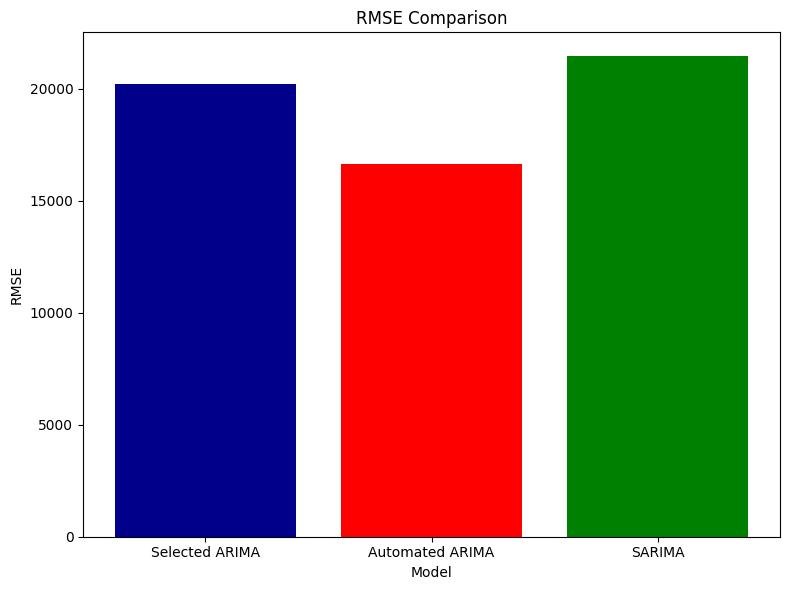

In [106]:
# Given values
values = [rmse_ar, rmse_auto, rmse_sarima]  # Example values for rise_ar, rmse_auto, rmse_sarima
labels = ['Selected ARIMA', 'Automated ARIMA', 'SARIMA']

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['darkblue', 'red', 'green'])

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')

# Display the plot
plt.tight_layout()
plt.show()

<center><h1 style="font-size: 20px;">However, the Automated-ARIMA has the least RMSE Value.</b></h1></center><br>

ARIMA Metrics:
RMSE: 20209.43, MAE: 16602.09

SARIMA Metrics:
RMSE: 21441.85, MAE: 18761.63

Auto ARIMA Metrics:
RMSE: 16636.83, MAE: 12243.55


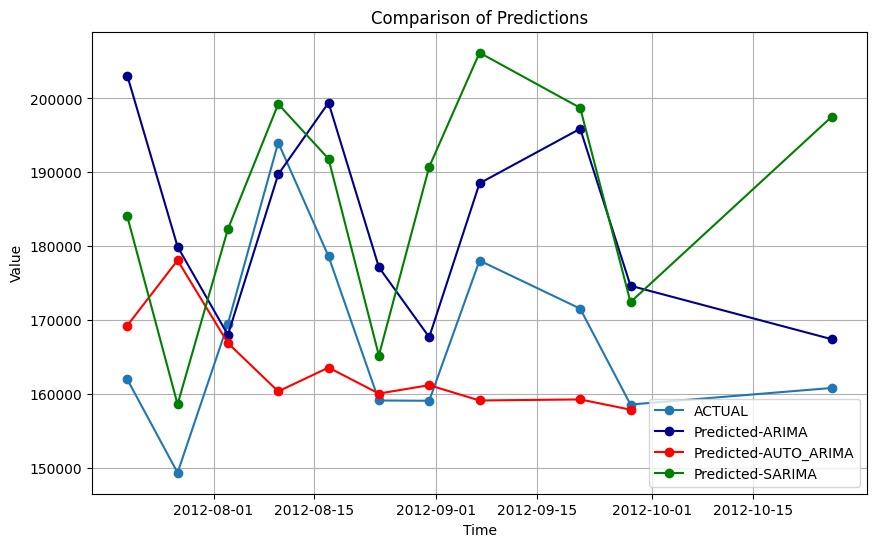

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate RMSE, MAE, MAPE for each model
def calculate_metrics(predictions, actual):
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    mae = mean_absolute_error(actual, predictions)
    return rmse, mae

# Calculate metrics for each model
rmse_arima, mae_arima = calculate_metrics(predictions, test)
rmse_sarima, mae_sarima = calculate_metrics(predictions_sarima, test)
rmse_auto_arima, mae_auto_arima = calculate_metrics(predictions_auto, test[:-1])

# Print metrics
print("ARIMA Metrics:")
print(f"RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}")

print("\nSARIMA Metrics:")
print(f"RMSE: {rmse_sarima:.2f}, MAE: {mae_sarima:.2f}")

print("\nAuto ARIMA Metrics:")
print(f"RMSE: {rmse_auto_arima:.2f}, MAE: {mae_auto_arima:.2f}")

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, marker='o', label='ACTUAL')
plt.plot(test.index, predictions, marker='o',color = 'darkblue',label='Predicted-ARIMA')
plt.plot(test.index[:-1], predictions_auto, marker='o',color  = 'red',label='Predicted-AUTO_ARIMA')
plt.plot(test.index, predictions_sarima, marker='o',color = 'green', label='Predicted-SARIMA')
plt.title('Comparison of Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()